In [1]:
#from google.colab import drive
#drive.mount('/content/drive')
import sys
#PATH = '/content/drive/My Drive/PPM_Stability/'
PATH = "C:/Users/velmurug/Documents/Stability Experiments/benchmark_interpretability/PPM_Stability/"
#PATH = "C:/Users/Mythreyi/Documents/GitHub/Stability-Experiments/benchmark_interpretability/PPM_Stability/"
#PATH = "C:/Users/mythr/Documents/GitHub/Stability-Experiments/benchmark_interpretability/PPM_Stability/"
#PATH = "C:/Users/n9455647/Documents/GitHub/Stability-Experiments/benchmark_interpretability/PPM_Stability/"
sys.path.append(PATH)

In [2]:
from DatasetManager import DatasetManager

import pandas as pd
import numpy as np

import os
import sys
from sys import argv
import pickle
import random
import joblib

import statistics

import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dataset_ref = "bpic2012"
params_dir = PATH + "params"
results_dir = "results"
bucket_method = "prefix"
cls_encoding = "index"
cls_method = "xgboost"

gap = 1
n_iter = 1

method_name = "%s_%s"%(bucket_method, cls_encoding)

generate_samples = False
generate_lime = True
generate_kernel_shap = False
generate_model_shap = True

sample_size = 2
exp_iter = 10
max_feat = 10
max_prefix = 25

dataset_ref_to_datasets = {
    #"bpic2011": ["bpic2011_f%s"%formula for formula in range(1,5)],
    "bpic2015": ["bpic2015_%s_f2"%(municipality) for municipality in range(5,6)],
    "bpic2017" : ["bpic2017_accepted"],
    "bpic2012" : ["bpic2012_accepted"]
    #"insurance": ["insurance_activity", "insurance_followup"],
    #"sepsis_cases": ["sepsis_cases_1", "sepsis_cases_2", "sepsis_cases_4"]
}

datasets = [dataset_ref] if dataset_ref not in dataset_ref_to_datasets else dataset_ref_to_datasets[dataset_ref]

datasets

['bpic2012_accepted']

Bucket 1
True Negatives
Average LIME Stability: 0.29111111111111115
Average SHAP Stability: 1.0


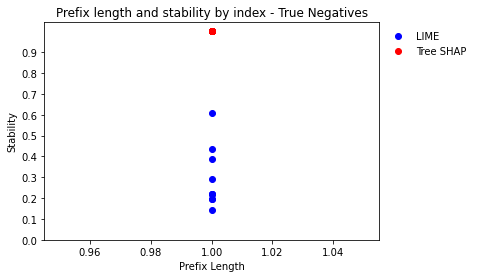

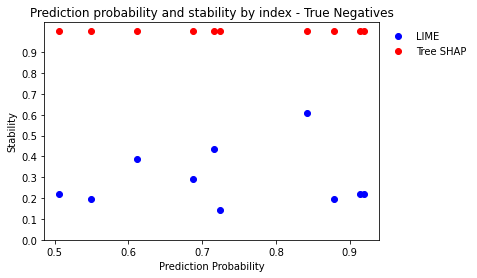

True Positives
Average LIME Stability: 0.24955555555555586
Average SHAP Stability: 1.0


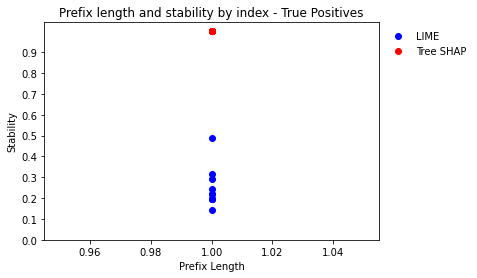

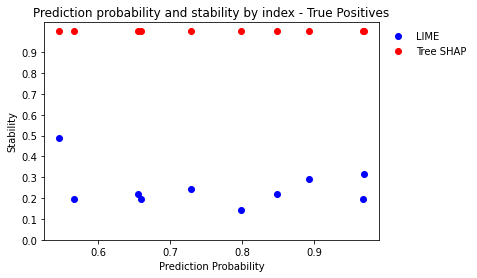

False Negatives
Average LIME Stability: 0.27155555555555566
Average SHAP Stability: 1.0


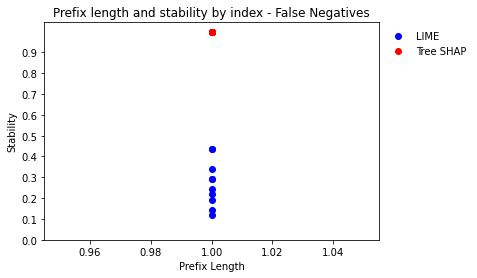

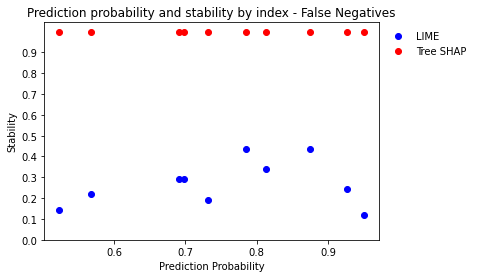

False Positives
Average LIME Stability: 0.3180000000000002
Average SHAP Stability: 1.0


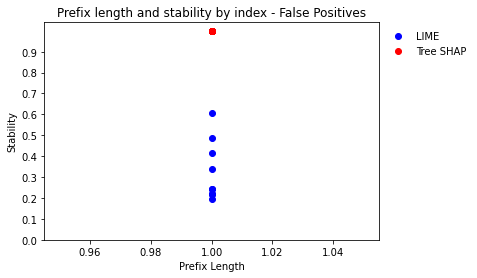

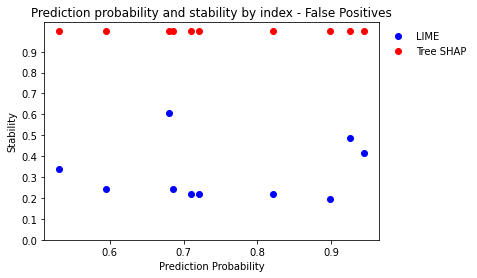

Bucket 2
True Negatives
Average LIME Stability: 0.6453333333333333
Average SHAP Stability: 1.0


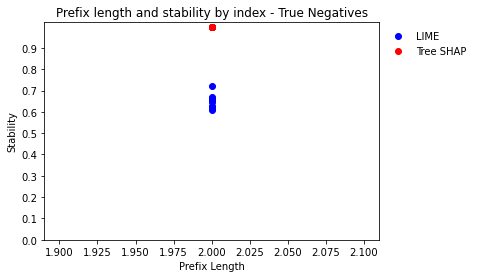

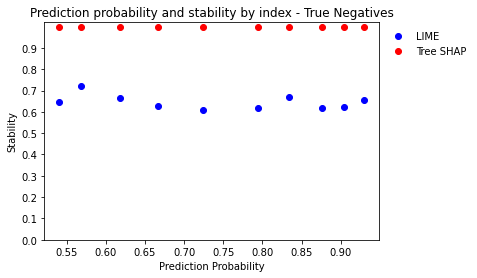

True Positives
Average LIME Stability: 0.6627272727272727
Average SHAP Stability: 1.0


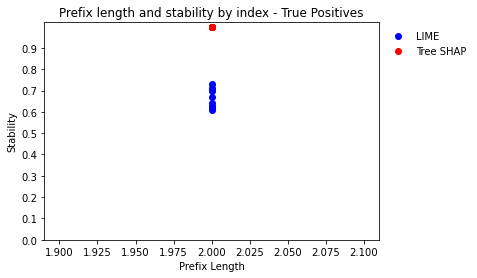

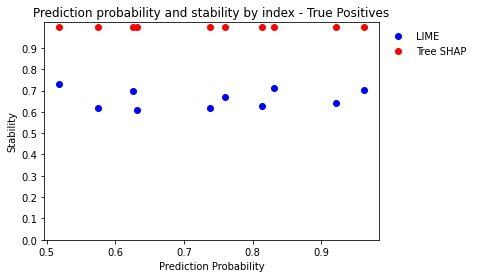

False Negatives
Average LIME Stability: 0.6542424242424243
Average SHAP Stability: 1.0


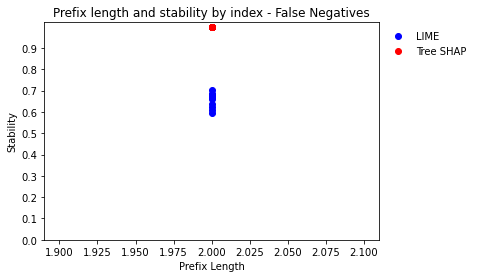

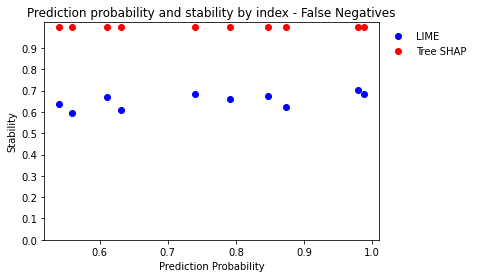

False Positives
Average LIME Stability: 0.6703636363636364
Average SHAP Stability: 1.0


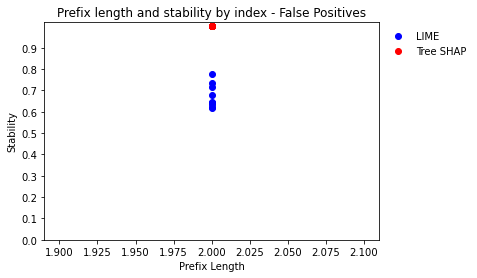

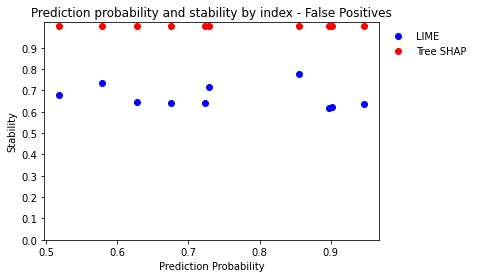

Bucket 3
True Negatives
Average LIME Stability: 0.6811594202898551
Average SHAP Stability: 1.0


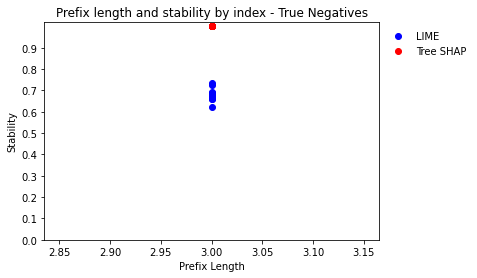

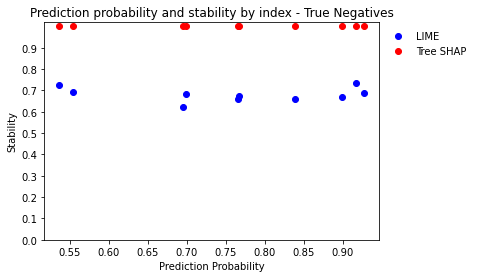

True Positives
Average LIME Stability: 0.6668115942028985
Average SHAP Stability: 1.0


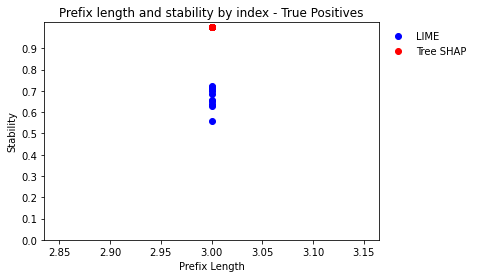

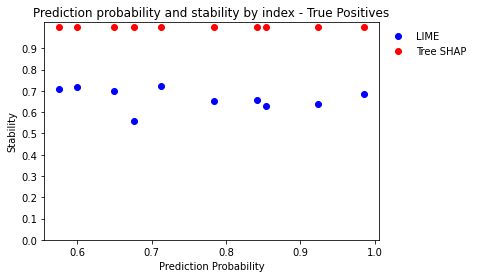

False Negatives
Average LIME Stability: 0.6977391304347826
Average SHAP Stability: 1.0


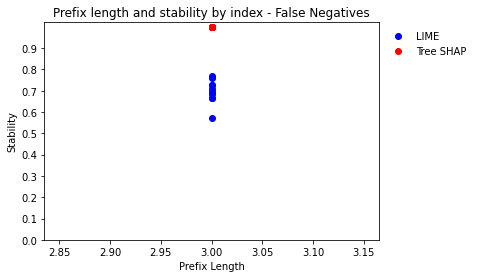

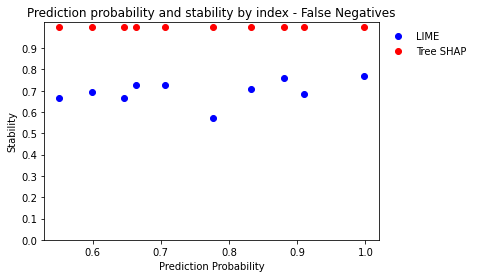

False Positives
Average LIME Stability: 0.6760579710144927
Average SHAP Stability: 1.0


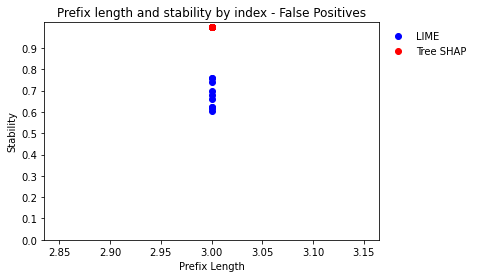

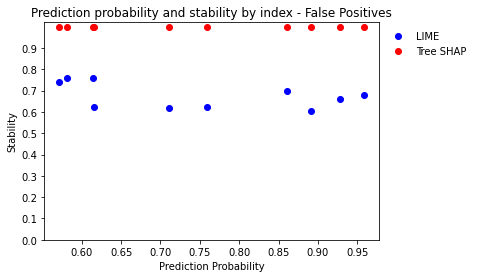

Bucket 4
True Negatives
Average LIME Stability: 0.2507407407407407
Average SHAP Stability: 1.0


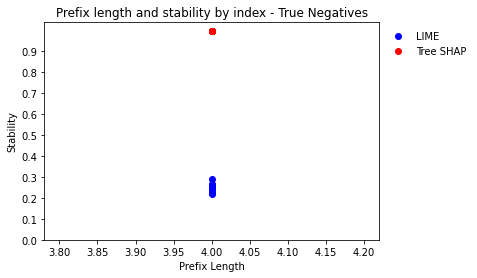

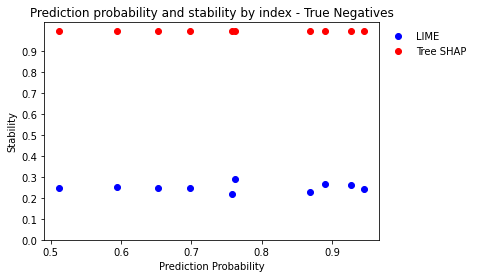

True Positives
Average LIME Stability: 0.2444444444444445
Average SHAP Stability: 1.0


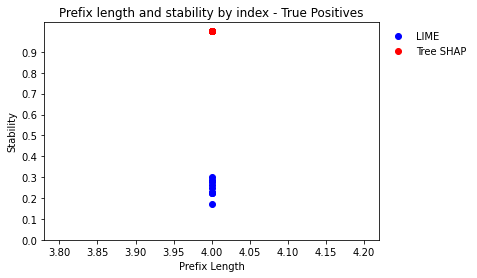

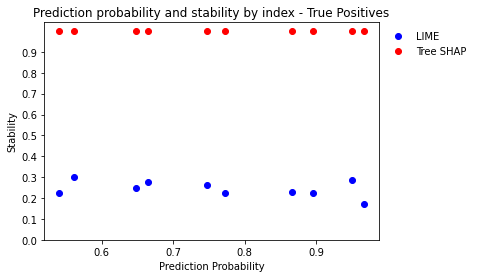

False Negatives
Average LIME Stability: 0.24847407407407404
Average SHAP Stability: 1.0


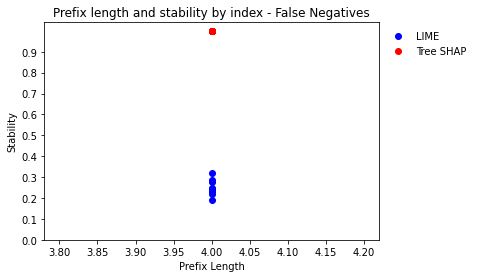

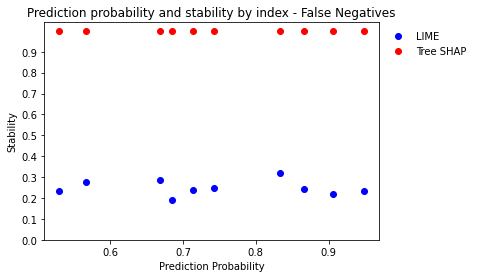

False Positives
Average LIME Stability: 0.24998518518518514
Average SHAP Stability: 1.0


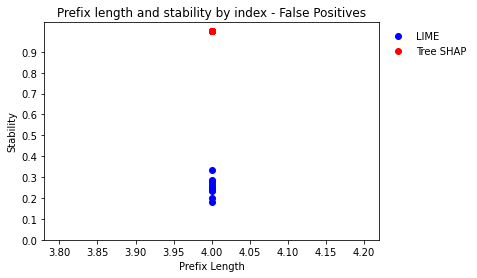

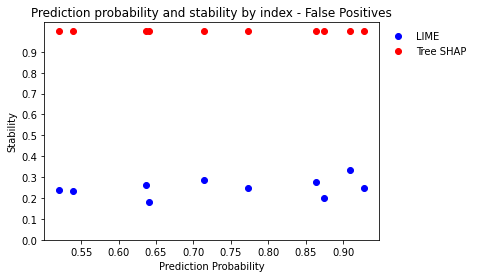

Bucket 5
True Negatives
Average LIME Stability: 0.33182254196642674
Average SHAP Stability: 1.0


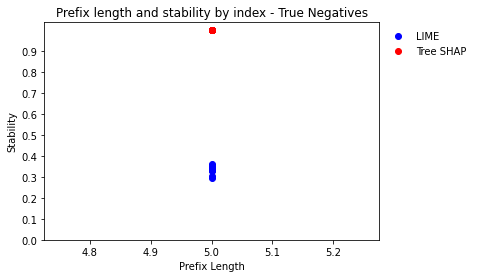

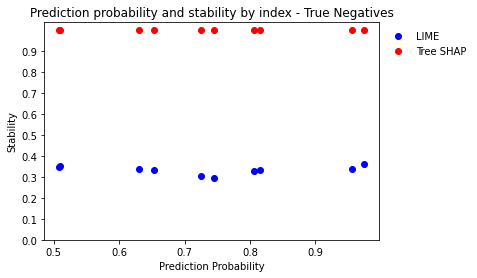

True Positives
Average LIME Stability: 0.35516706634692236
Average SHAP Stability: 1.0


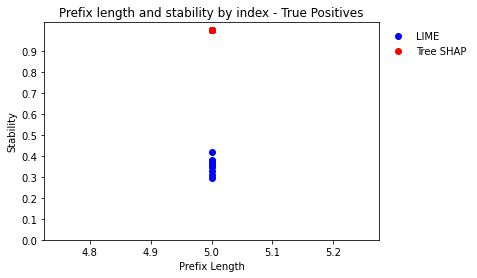

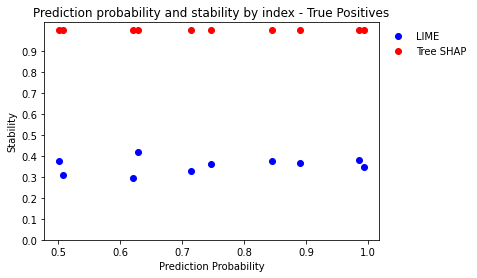

False Negatives
Average LIME Stability: 0.32991686650679436
Average SHAP Stability: 1.0


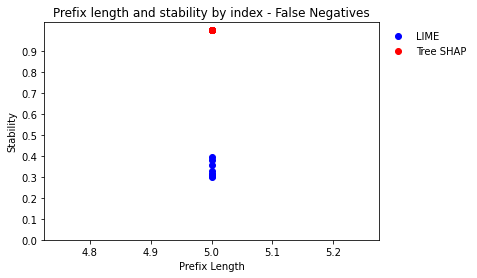

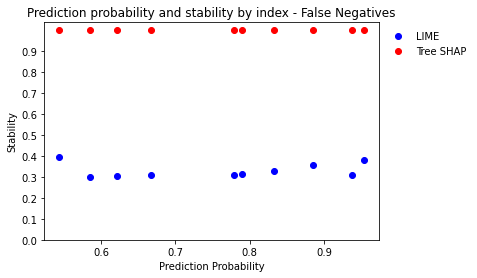

False Positives
Average LIME Stability: 0.32300879296562734
Average SHAP Stability: 1.0


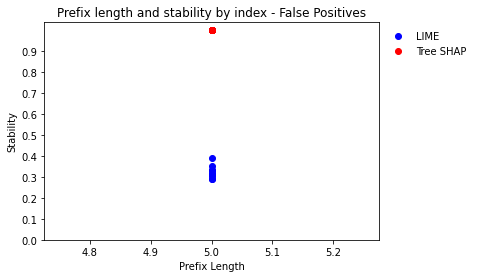

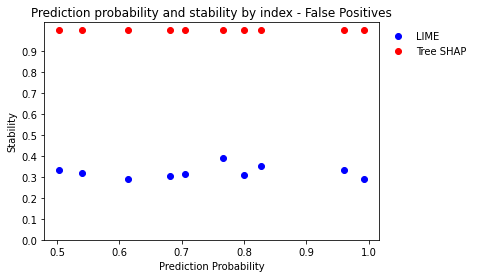

Bucket 6
True Negatives
Average LIME Stability: 0.22499889988998897
Average SHAP Stability: 1.0


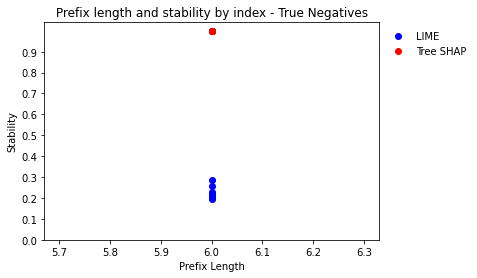

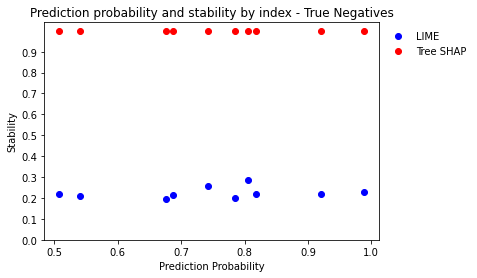

True Positives
Average LIME Stability: 0.23829262926292627
Average SHAP Stability: 1.0


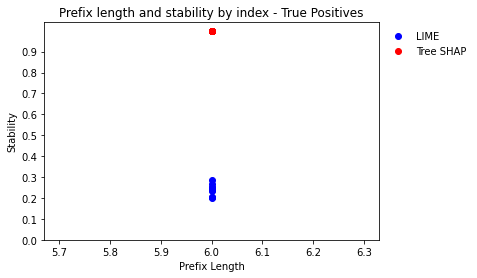

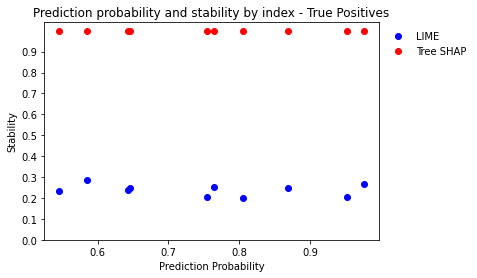

False Negatives
Average LIME Stability: 0.23316171617161716
Average SHAP Stability: 1.0


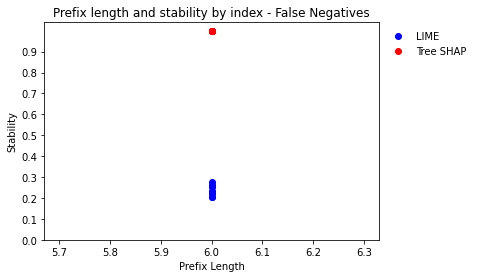

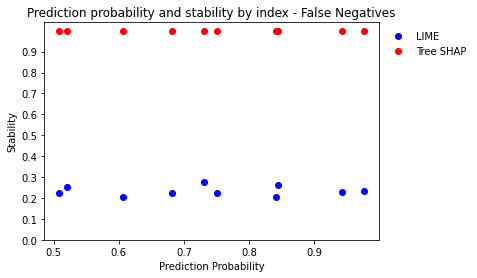

False Positives
Average LIME Stability: 0.23012981298129806
Average SHAP Stability: 1.0


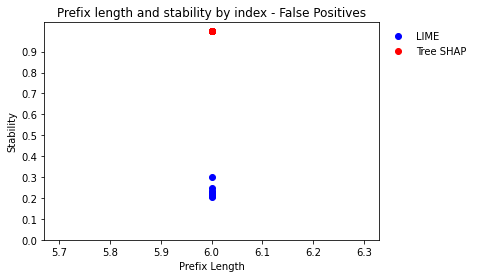

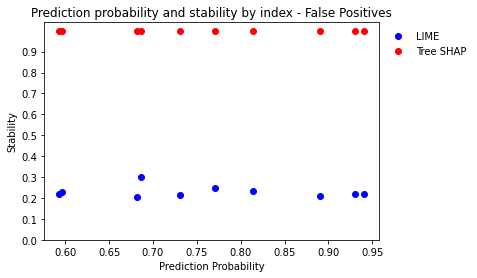

Bucket 7
True Negatives
Average LIME Stability: 0.18052238805970142
Average SHAP Stability: 1.0


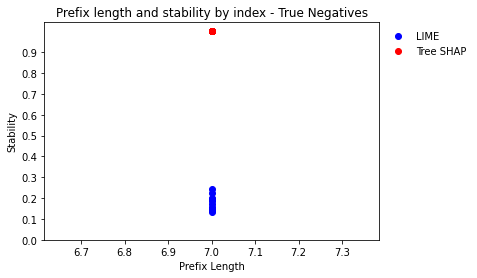

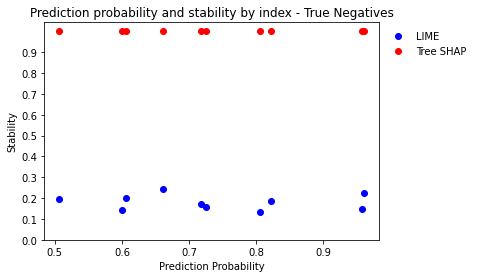

True Positives
Average LIME Stability: 0.18121393034825867
Average SHAP Stability: 1.0


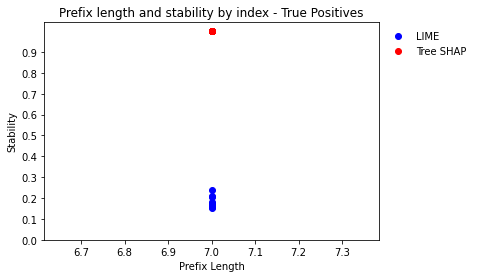

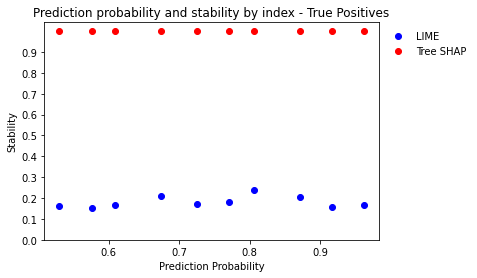

False Negatives
Average LIME Stability: 0.1892819237147595
Average SHAP Stability: 1.0


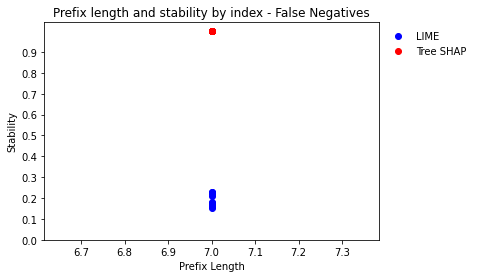

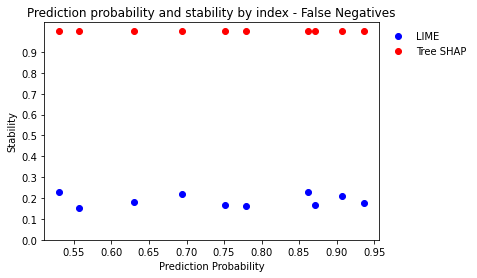

False Positives
Average LIME Stability: 0.18789883913764505
Average SHAP Stability: 1.0


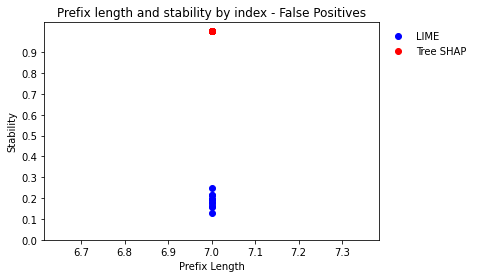

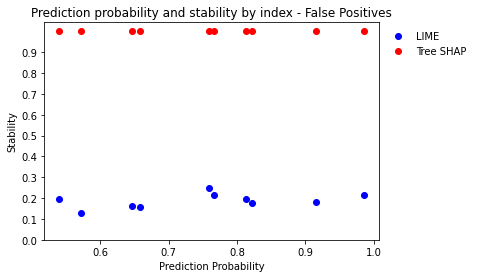

Bucket 8
True Negatives
Average LIME Stability: 0.12828855721393018
Average SHAP Stability: 1.0


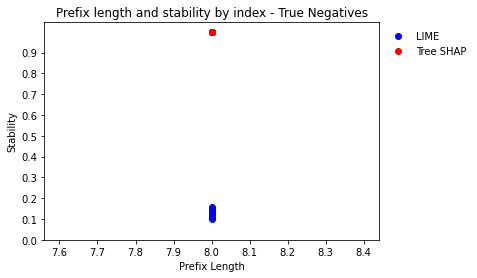

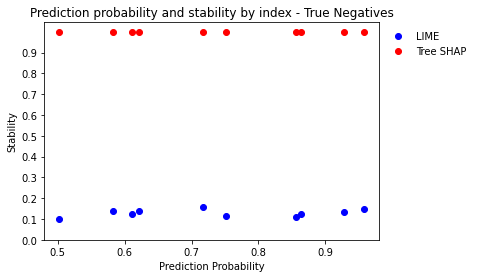

True Positives
Average LIME Stability: 0.1294328358208954
Average SHAP Stability: 1.0


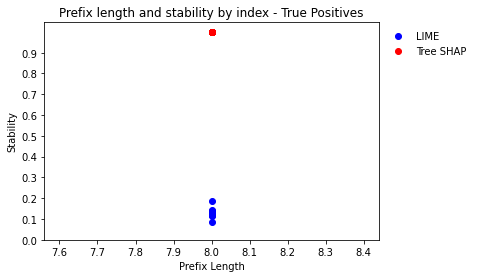

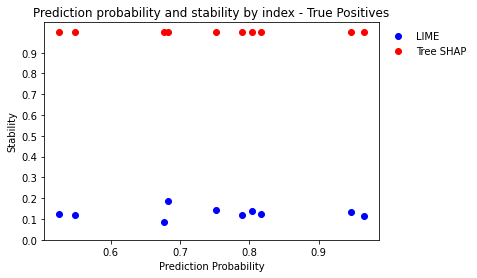

False Negatives
Average LIME Stability: 0.12485572139303465
Average SHAP Stability: 1.0


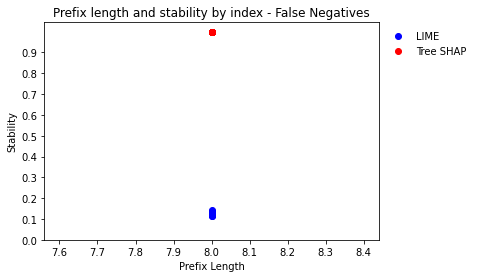

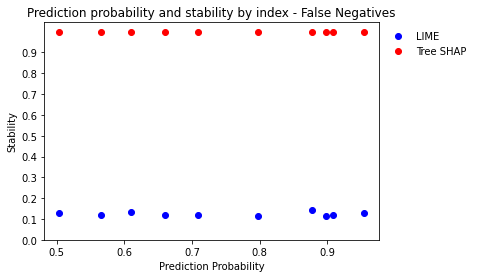

False Positives
Average LIME Stability: 0.13996019900497494
Average SHAP Stability: 1.0


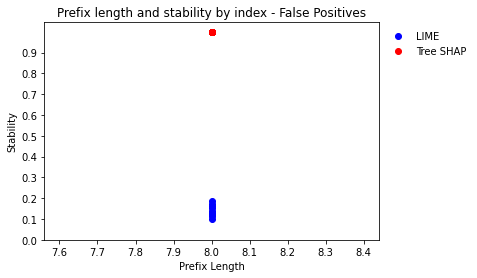

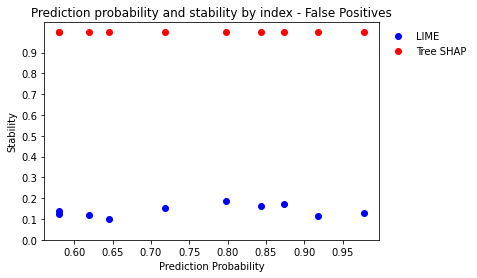

Bucket 9
True Negatives
Average LIME Stability: 0.13290274314214454
Average SHAP Stability: 1.0


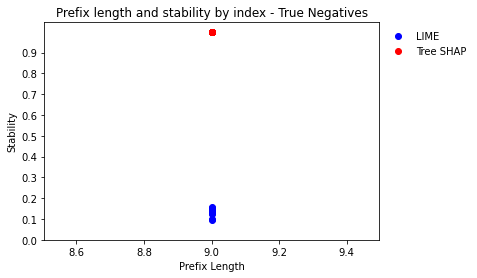

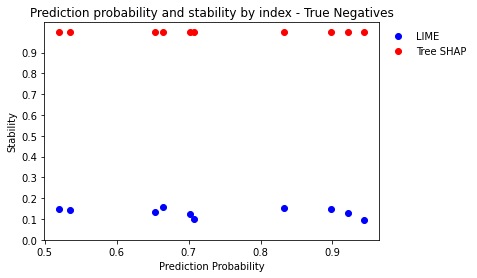

True Positives
Average LIME Stability: 0.13381379883624273
Average SHAP Stability: 1.0


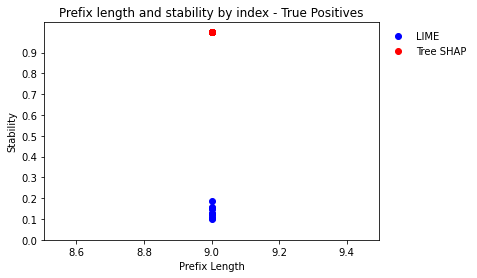

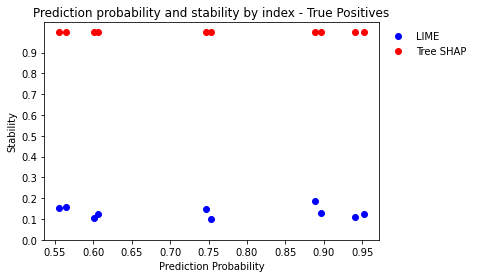

False Negatives
Average LIME Stability: 0.14451870324189525
Average SHAP Stability: 1.0


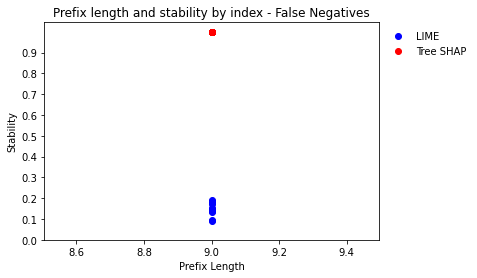

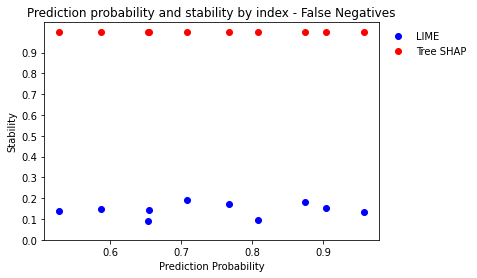

False Positives
Average LIME Stability: 0.15112385702410633
Average SHAP Stability: 1.0


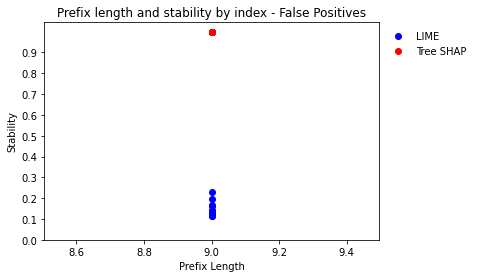

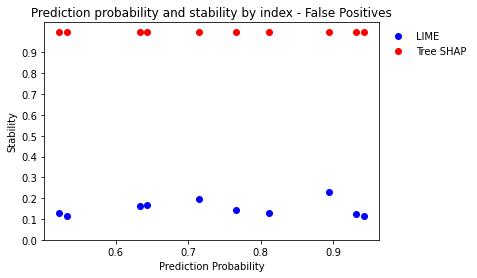

Bucket 10
True Negatives
Average LIME Stability: 0.09733808167141486
Average SHAP Stability: 1.0


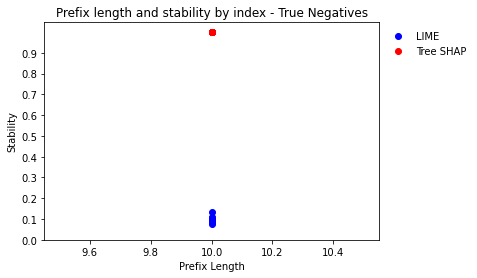

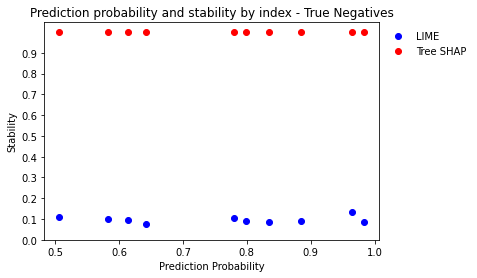

True Positives
Average LIME Stability: 0.09983475783475765
Average SHAP Stability: 1.0


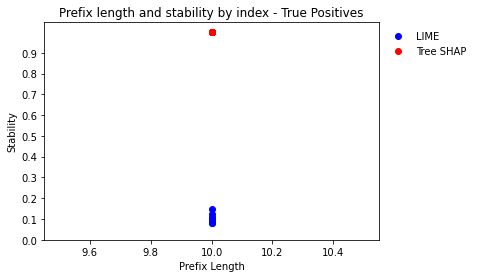

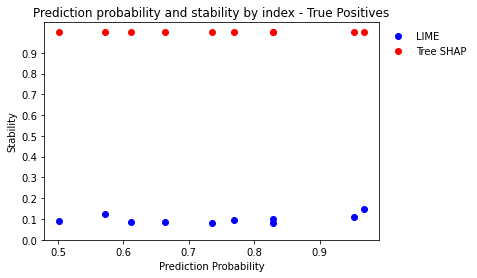

False Negatives
Average LIME Stability: 0.0950683760683759
Average SHAP Stability: 1.0


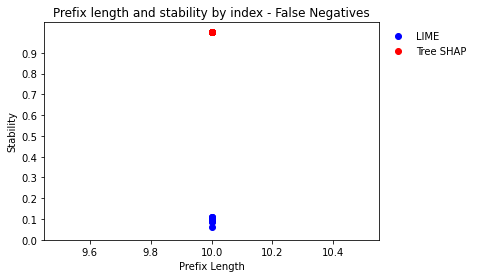

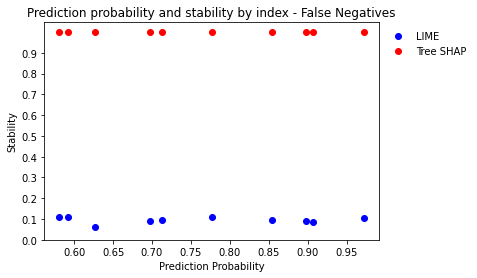

False Positives
Average LIME Stability: 0.08939411206077862
Average SHAP Stability: 1.0


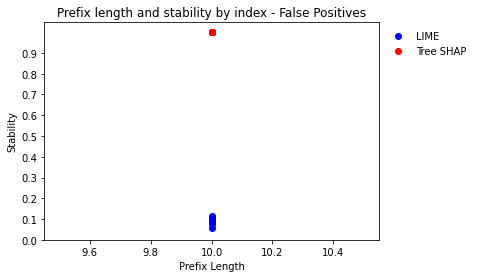

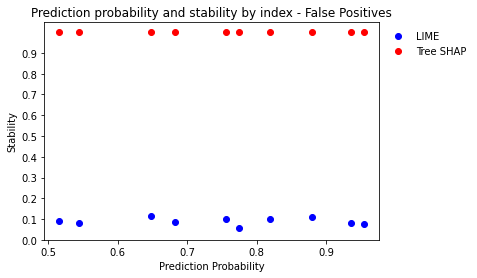

Bucket 11
True Negatives
Average LIME Stability: 0.09879750778816197
Average SHAP Stability: 1.0


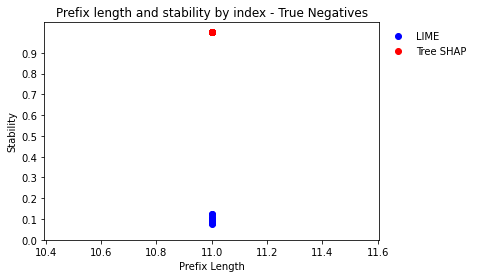

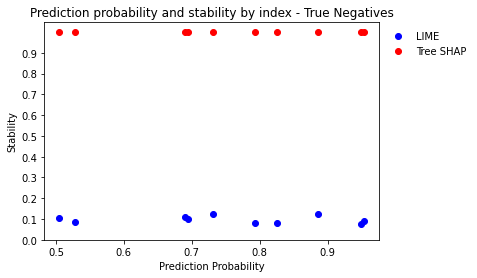

True Positives
Average LIME Stability: 0.09359086188992724
Average SHAP Stability: 1.0


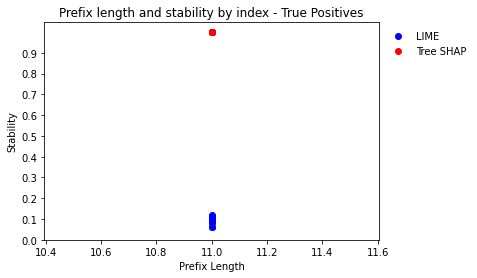

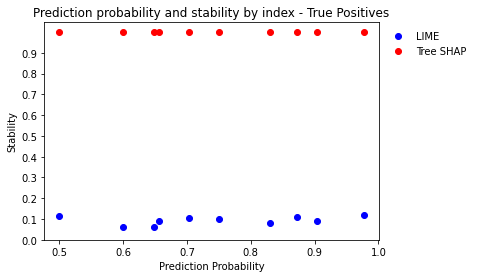

False Negatives
Average LIME Stability: 0.09404361370716505
Average SHAP Stability: 1.0


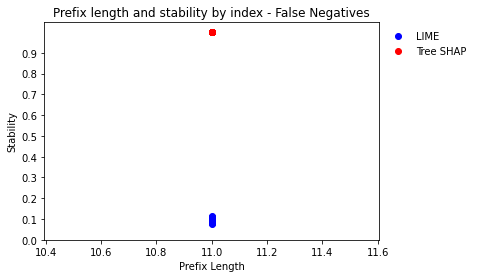

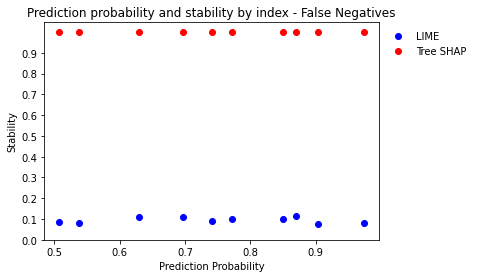

False Positives
Average LIME Stability: 0.08974247144340598
Average SHAP Stability: 1.0


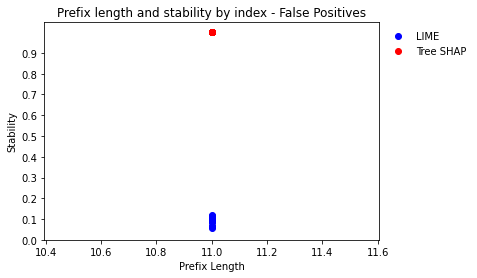

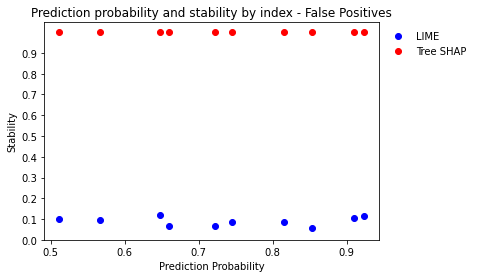

Bucket 12
True Negatives
Average LIME Stability: 0.08329212656364977
Average SHAP Stability: 1.0


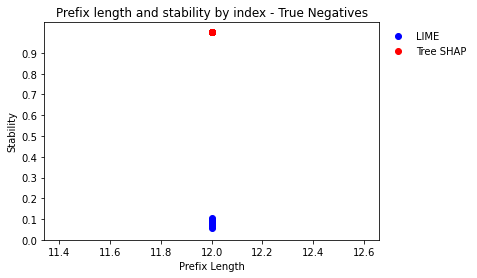

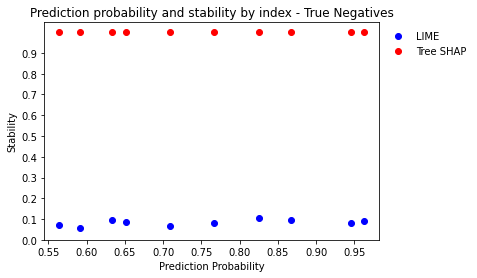

True Positives
Average LIME Stability: 0.08419573215599693
Average SHAP Stability: 1.0


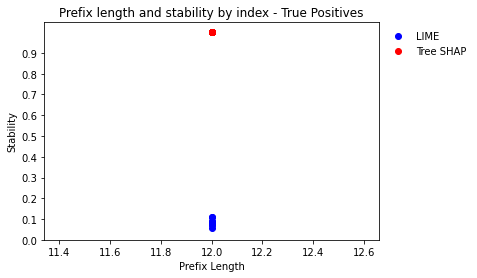

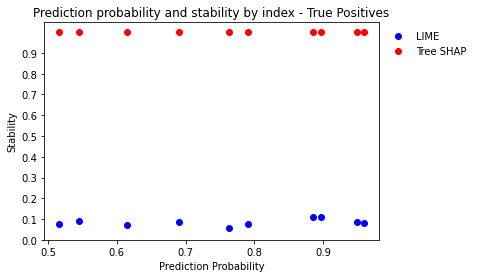

False Negatives
Average LIME Stability: 0.09503899926416474
Average SHAP Stability: 1.0


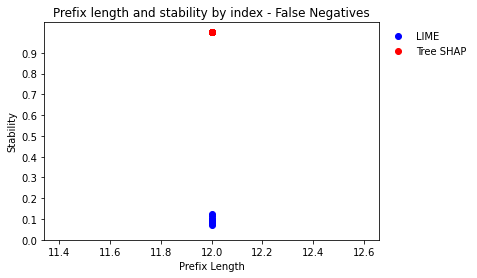

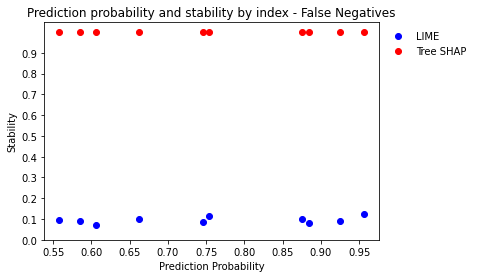

False Positives
Average LIME Stability: 0.0857770419426048
Average SHAP Stability: 1.0


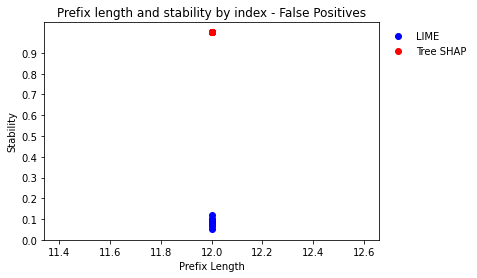

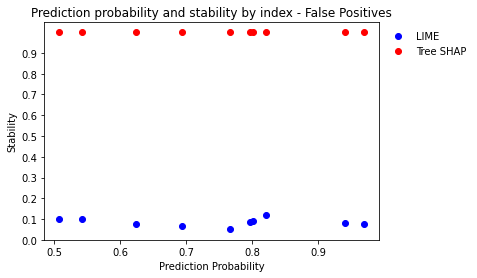

Bucket 13
True Negatives
Average LIME Stability: 0.09172549019607831
Average SHAP Stability: 1.0


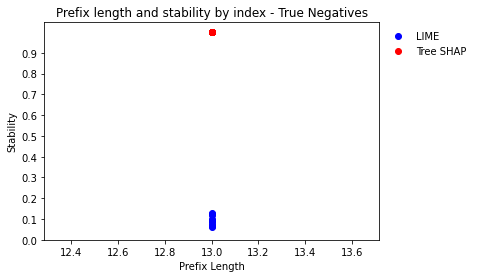

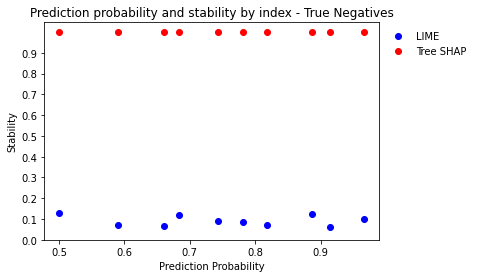

True Positives
Average LIME Stability: 0.09961764705882337
Average SHAP Stability: 1.0


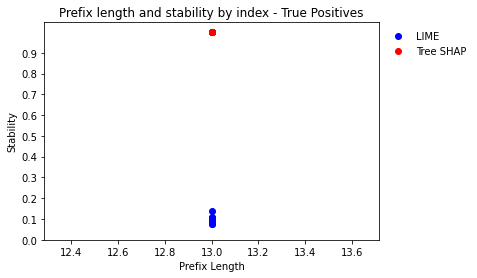

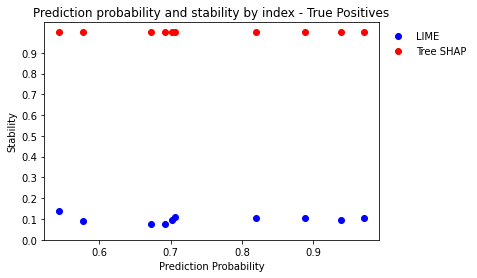

False Negatives
Average LIME Stability: 0.08541176470588227
Average SHAP Stability: 1.0


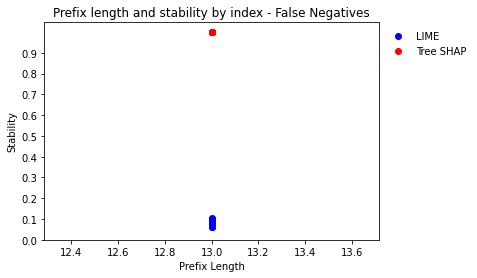

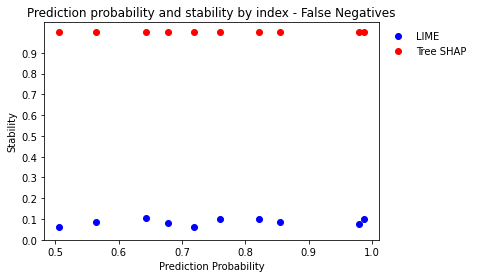

False Positives
Average LIME Stability: 0.0937549019607842
Average SHAP Stability: 1.0


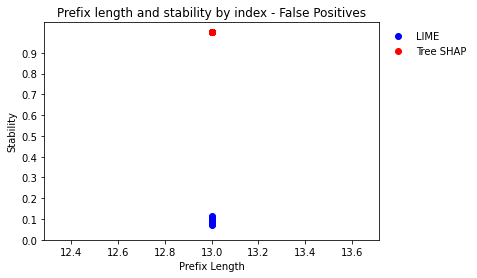

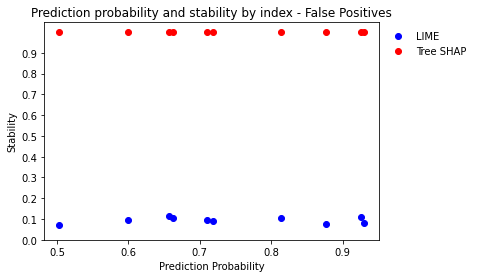

Bucket 14
True Negatives
Average LIME Stability: 0.14174269005847942
Average SHAP Stability: 1.0


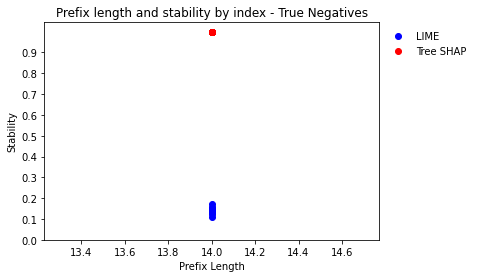

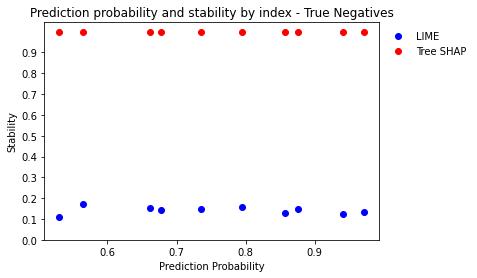

True Positives
Average LIME Stability: 0.1403918128654969
Average SHAP Stability: 1.0


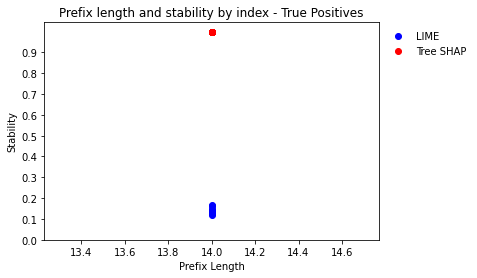

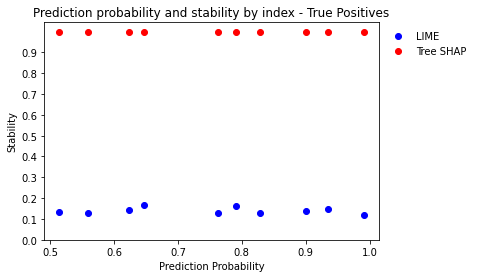

False Negatives
Average LIME Stability: 0.151423976608187
Average SHAP Stability: 1.0


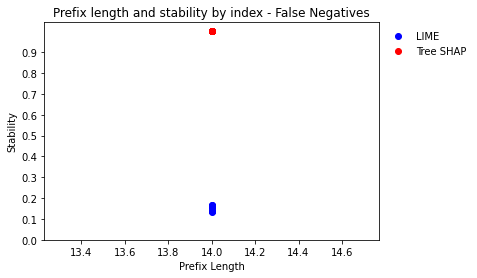

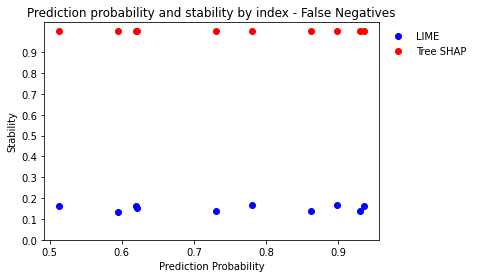

False Positives
Average LIME Stability: 0.14399415204678345
Average SHAP Stability: 1.0


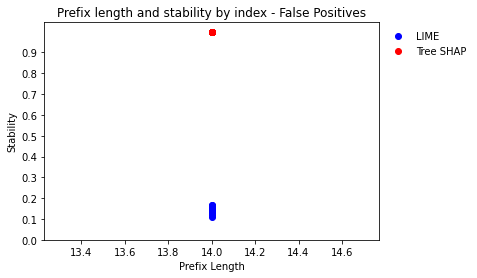

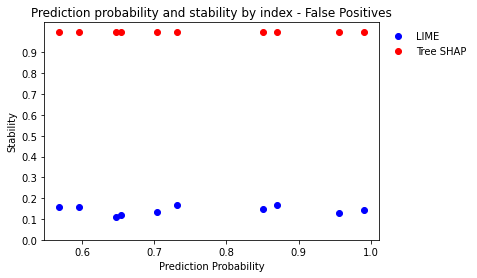

Bucket 15
True Negatives
Average LIME Stability: 0.15517195767195743
Average SHAP Stability: 1.0


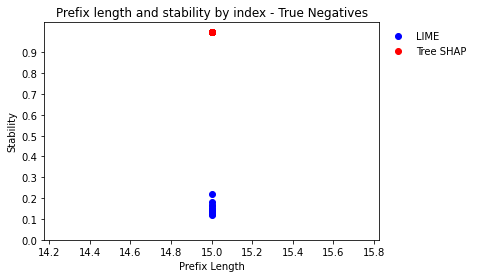

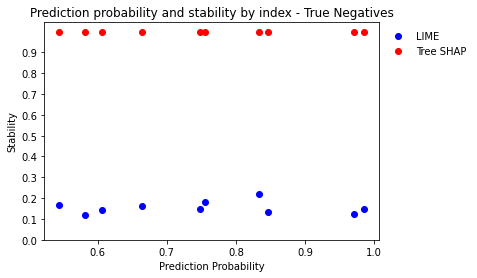

True Positives
Average LIME Stability: 0.1682142857142855
Average SHAP Stability: 1.0


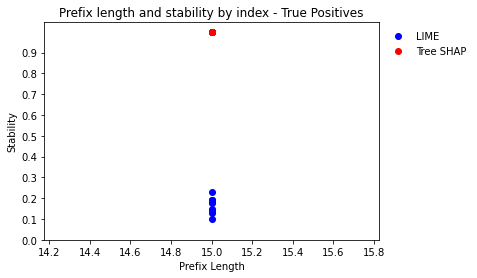

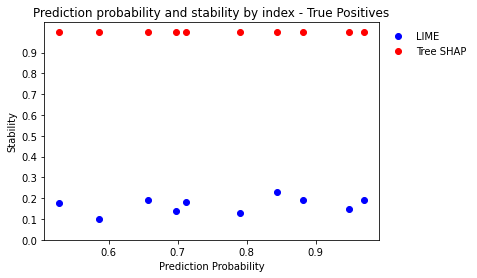

False Negatives
Average LIME Stability: 0.15629629629629613
Average SHAP Stability: 1.0


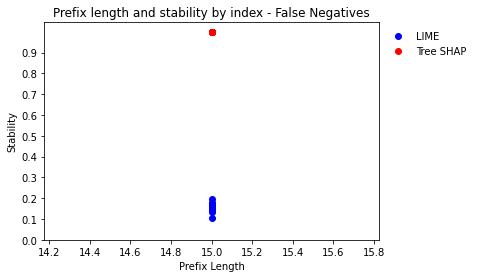

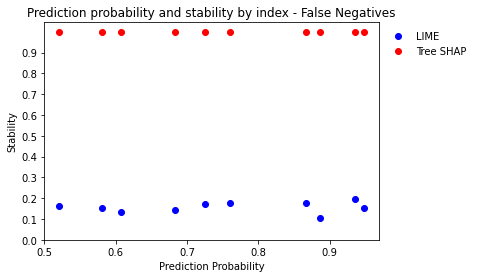

False Positives
Average LIME Stability: 0.15876984126984117
Average SHAP Stability: 1.0


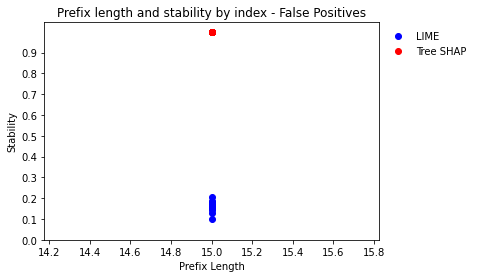

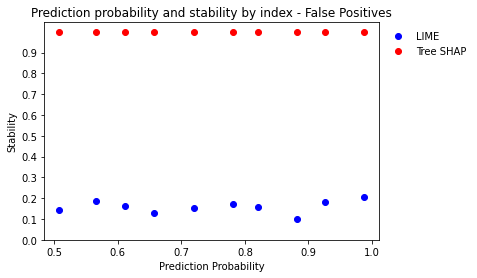

Bucket 16
True Negatives
Average LIME Stability: 0.19263326071169198
Average SHAP Stability: 1.0


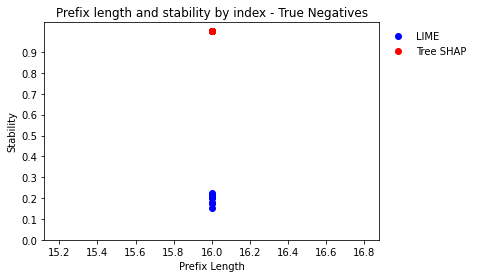

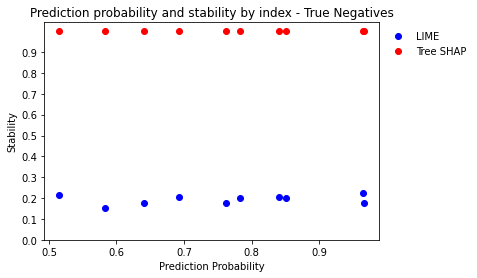

True Positives
Average LIME Stability: 0.18544468651658177
Average SHAP Stability: 1.0


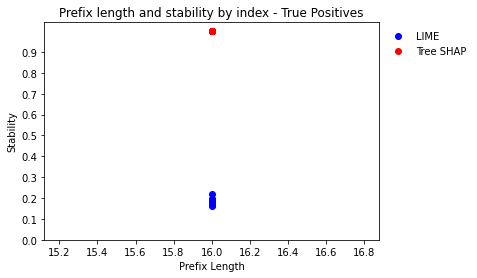

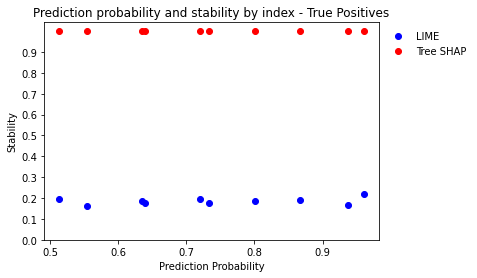

False Negatives
Average LIME Stability: 0.175111111111111
Average SHAP Stability: 1.0


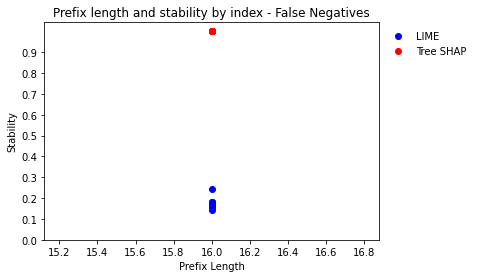

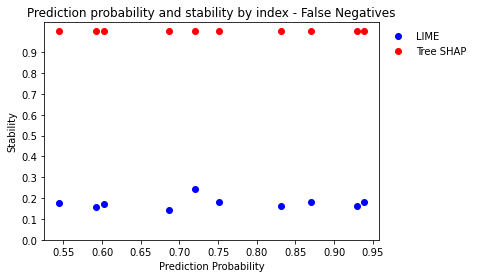

False Positives
Average LIME Stability: 0.18522004357298463
Average SHAP Stability: 1.0


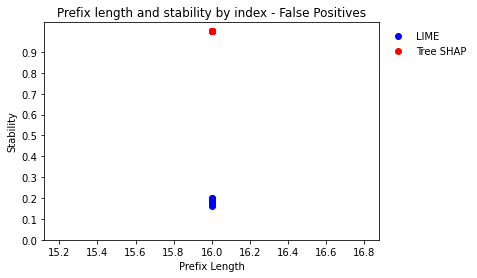

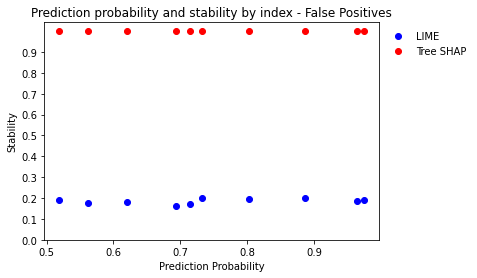

Bucket 17
True Negatives
Average LIME Stability: 0.1497621440536012
Average SHAP Stability: 1.0


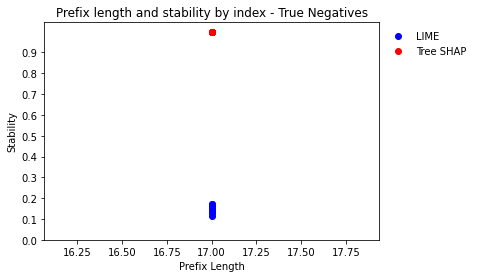

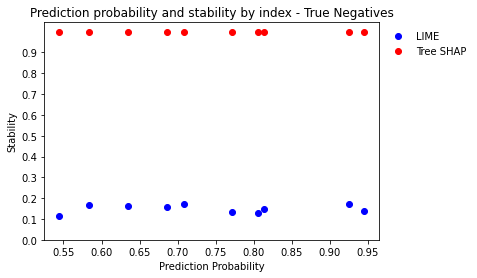

True Positives
Average LIME Stability: 0.15200670016750406
Average SHAP Stability: 1.0


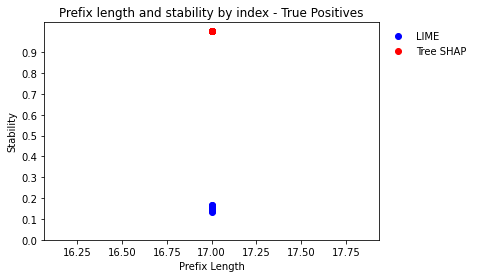

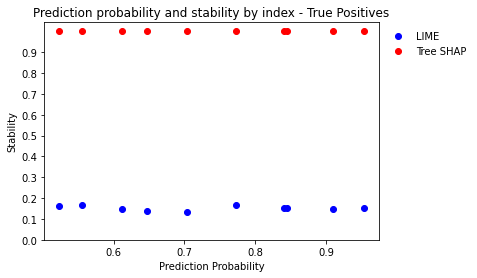

False Negatives
Average LIME Stability: 0.1580670016750418
Average SHAP Stability: 1.0


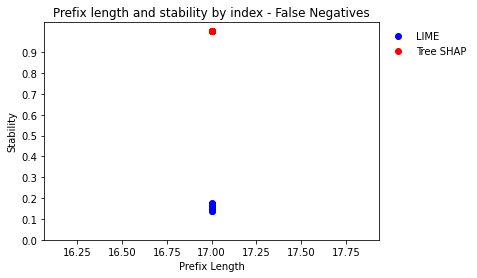

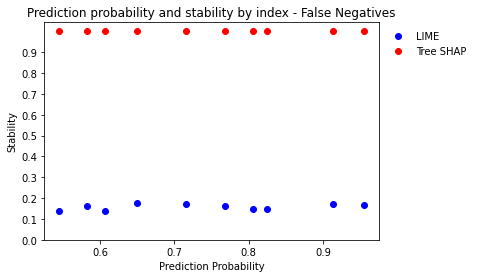

False Positives
Average LIME Stability: 0.15178224455611372
Average SHAP Stability: 1.0


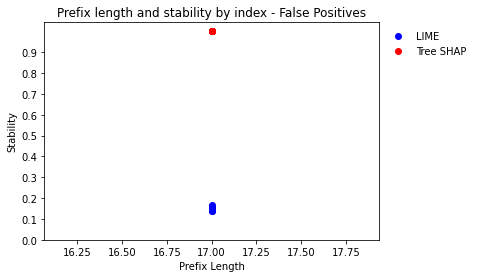

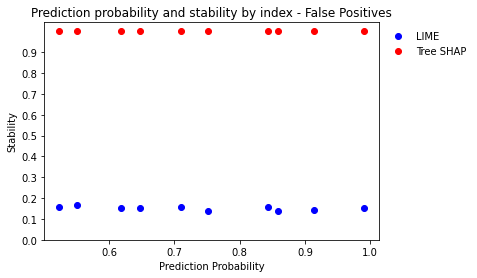

Bucket 18
True Negatives
Average LIME Stability: 0.2708724432110184
Average SHAP Stability: 1.0


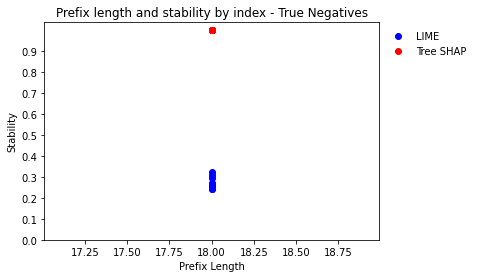

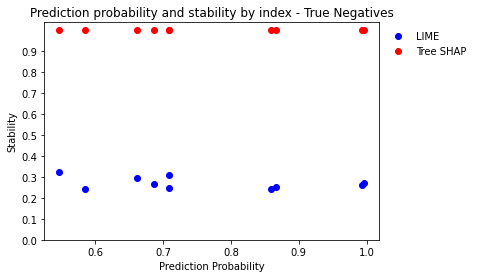

True Positives
Average LIME Stability: 0.26661116250385425
Average SHAP Stability: 1.0


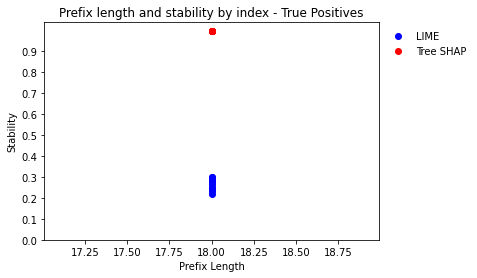

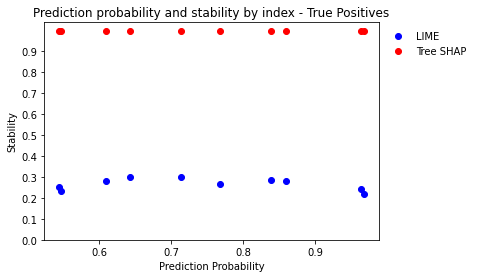

False Negatives
Average LIME Stability: 0.26234988179669017
Average SHAP Stability: 1.0


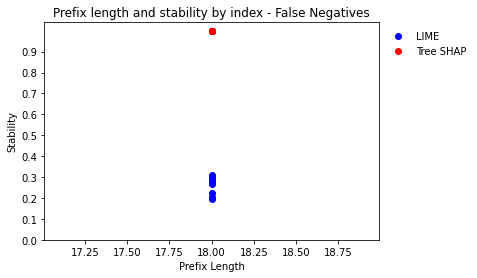

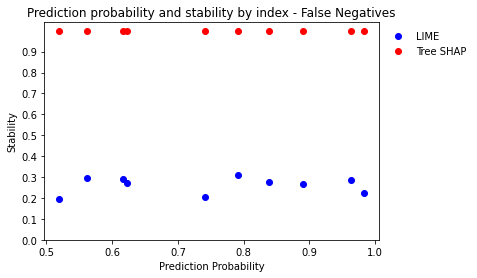

False Positives
Average LIME Stability: 0.2818620618768628
Average SHAP Stability: 1.0


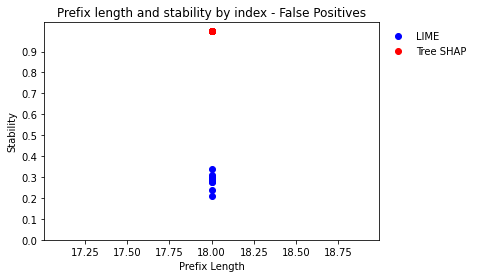

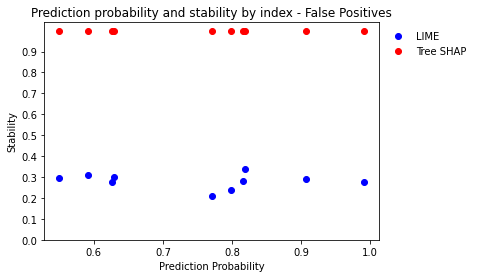

Bucket 19
True Negatives
Average LIME Stability: 0.1808118925100056
Average SHAP Stability: 1.0


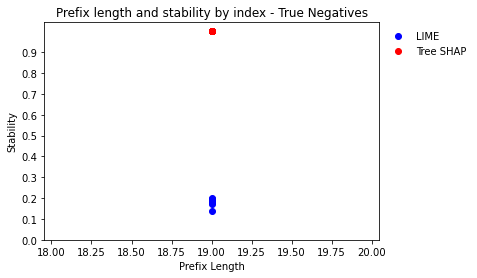

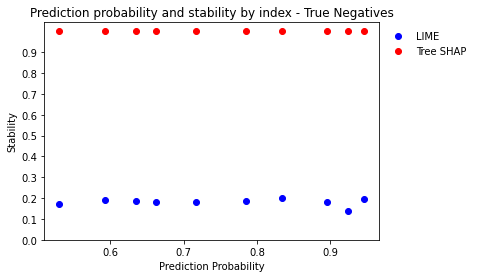

True Positives
Average LIME Stability: 0.18394968553459112
Average SHAP Stability: 1.0


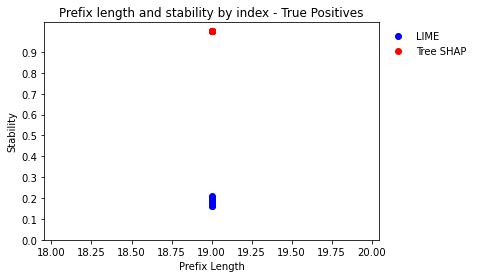

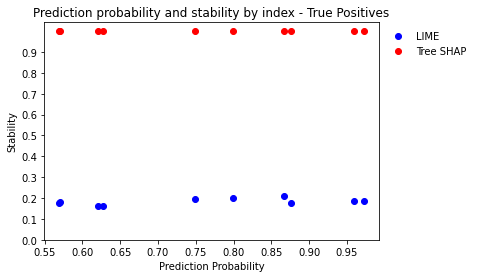

False Negatives
Average LIME Stability: 0.18148427672955966
Average SHAP Stability: 1.0


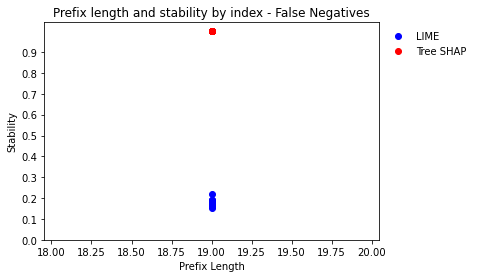

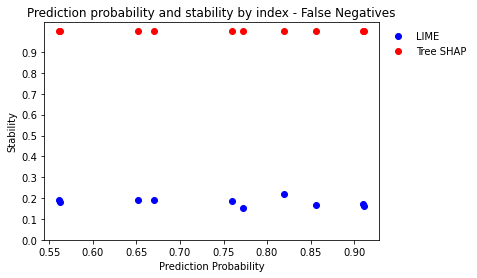

False Positives
Average LIME Stability: 0.1790583408485768
Average SHAP Stability: 1.0


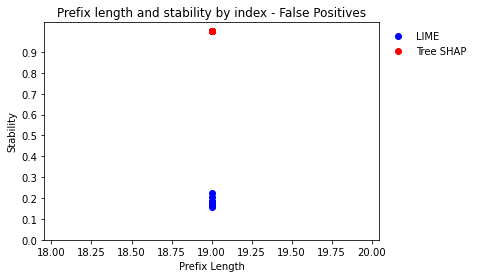

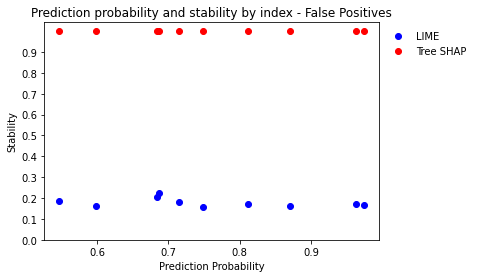

Bucket 20
True Negatives
Average LIME Stability: 0.3257599999999998
Average SHAP Stability: 1.0


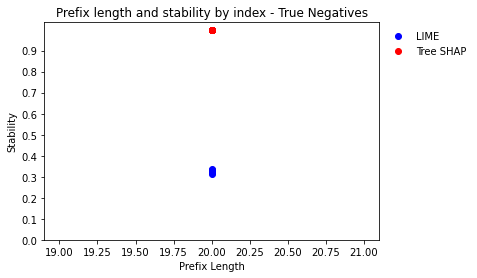

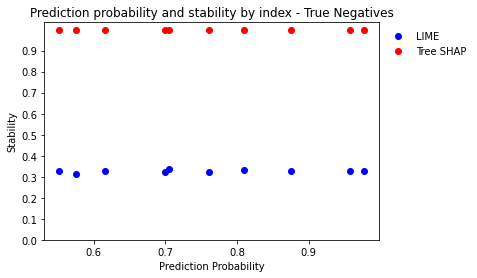

True Positives
Average LIME Stability: 0.3217279999999999
Average SHAP Stability: 1.0


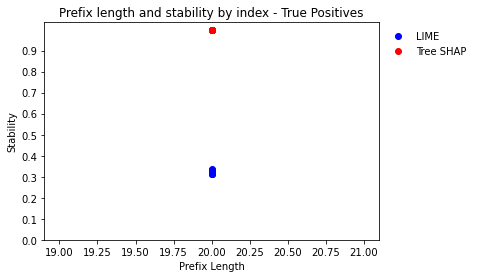

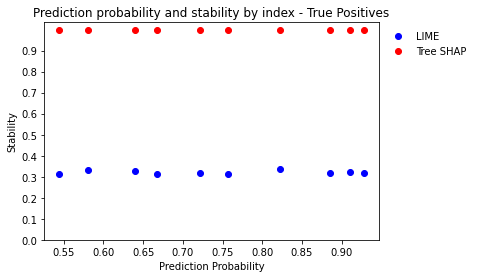

False Negatives
Average LIME Stability: 0.3223999999999999
Average SHAP Stability: 1.0


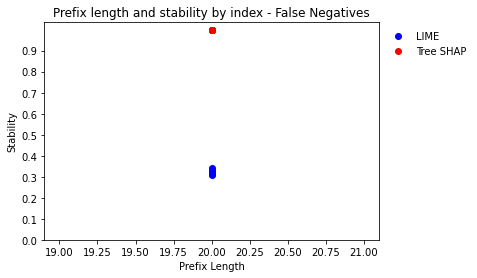

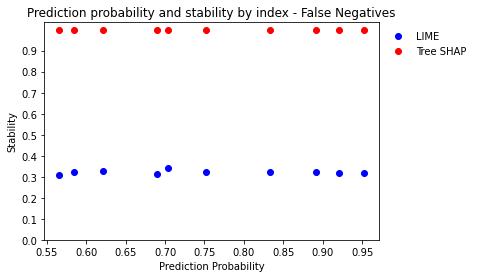

False Positives
Average LIME Stability: 0.3253119999999999
Average SHAP Stability: 1.0


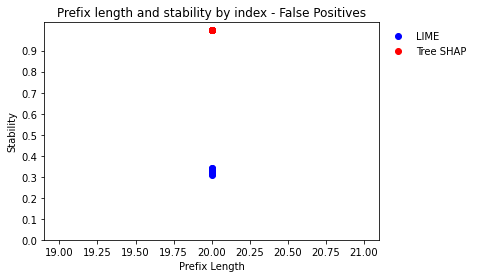

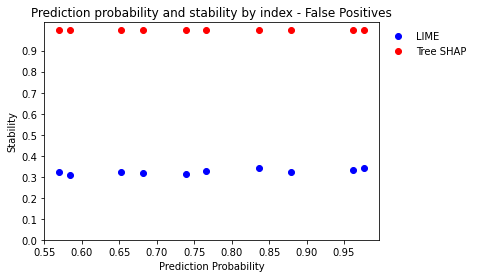

Bucket 21
True Negatives
Average LIME Stability: 0.28960319840079946
Average SHAP Stability: 1.0


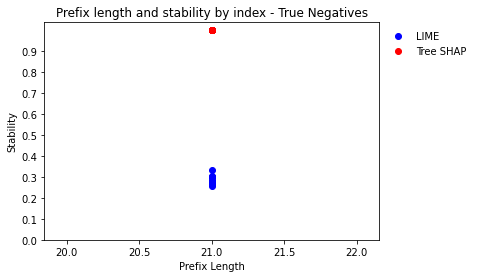

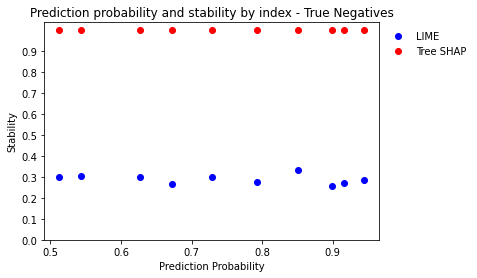

True Positives
Average LIME Stability: 0.27796101949025476
Average SHAP Stability: 1.0


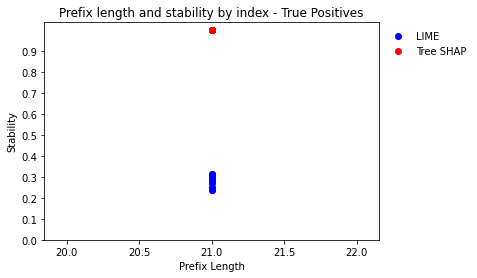

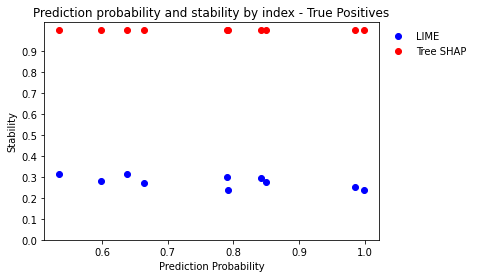

False Negatives
Average LIME Stability: 0.2725877061469264
Average SHAP Stability: 1.0


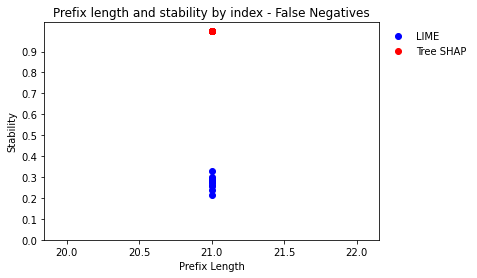

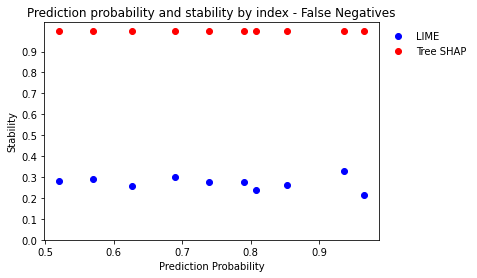

False Positives
Average LIME Stability: 0.2770654672663667
Average SHAP Stability: 1.0


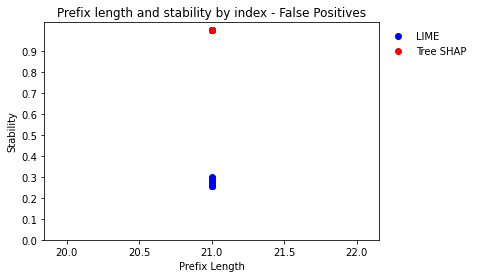

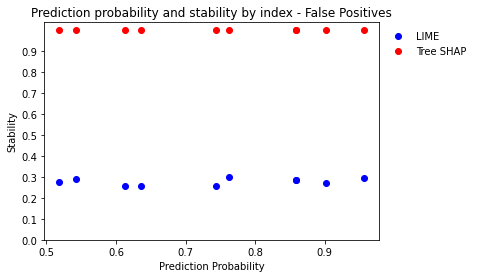

Bucket 22
True Negatives
Average LIME Stability: 0.3170049261083743
Average SHAP Stability: 1.0


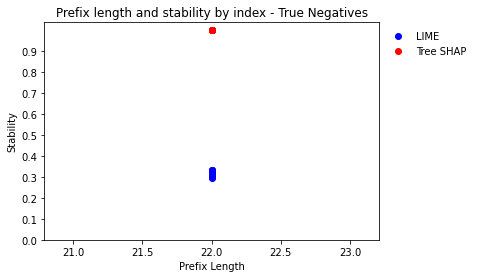

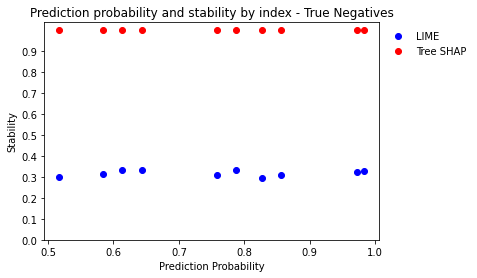

True Positives
Average LIME Stability: 0.31610978184377186
Average SHAP Stability: 1.0


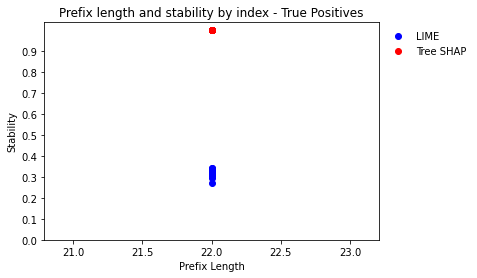

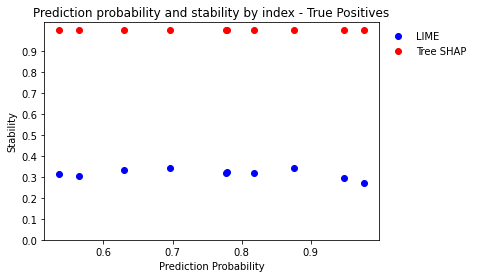

False Negatives
Average LIME Stability: 0.31745249824067545
Average SHAP Stability: 1.0


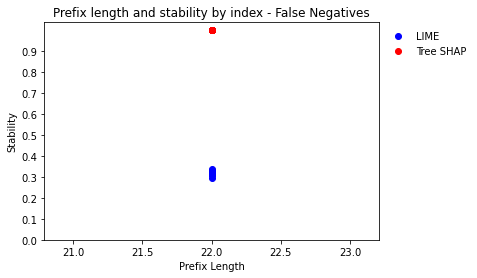

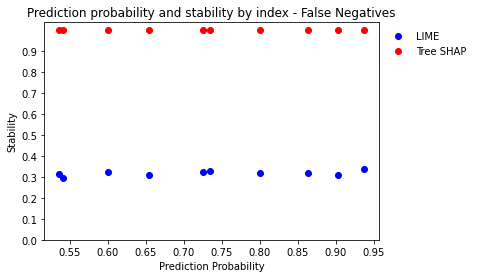

False Positives
Average LIME Stability: 0.3154384236453201
Average SHAP Stability: 1.0


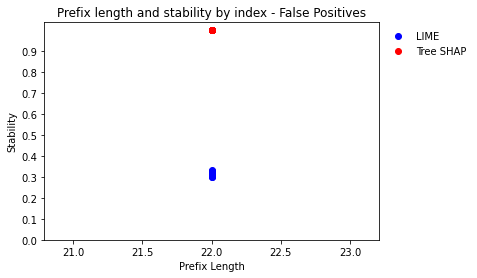

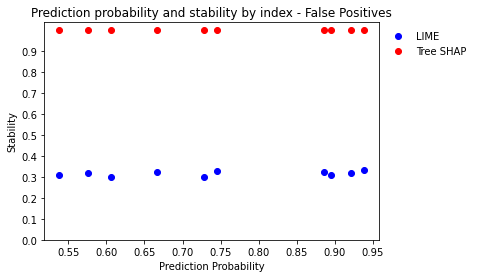

Bucket 23
True Negatives
Average LIME Stability: 0.27474618009197443
Average SHAP Stability: 1.0


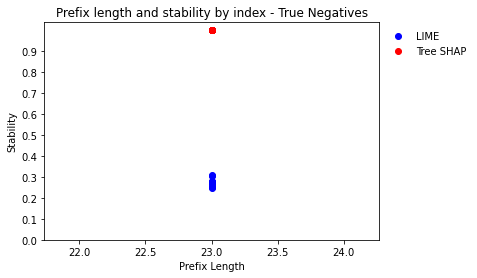

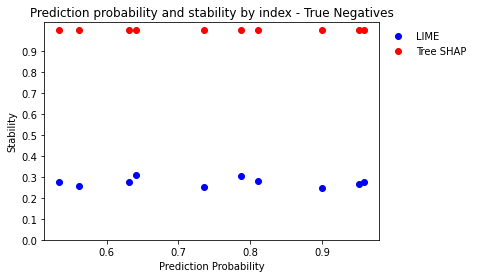

True Positives
Average LIME Stability: 0.26691648123423817
Average SHAP Stability: 1.0


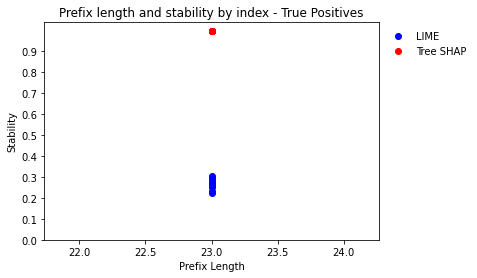

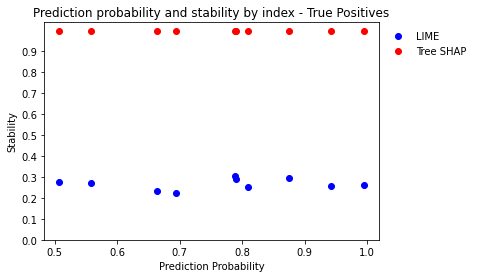

False Negatives
Average LIME Stability: 0.2816810562231122
Average SHAP Stability: 1.0


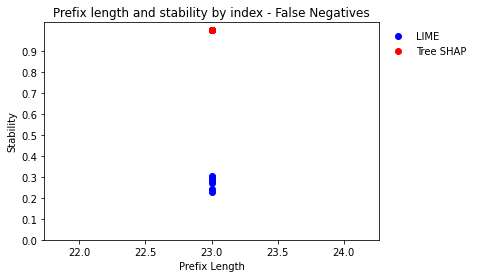

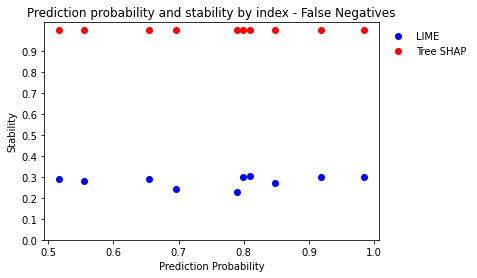

False Positives
Average LIME Stability: 0.27966770508826577
Average SHAP Stability: 1.0


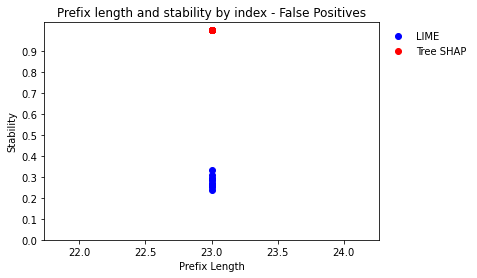

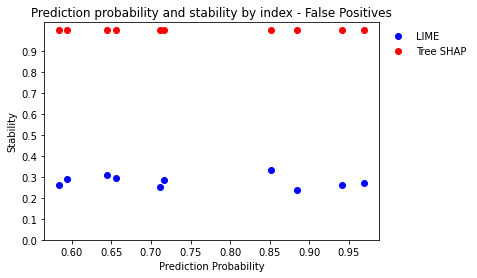

Bucket 24
True Negatives
Average LIME Stability: 0.36127276604819786
Average SHAP Stability: 1.0


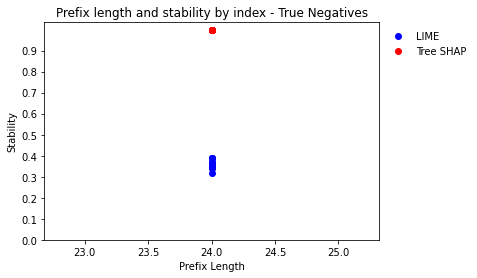

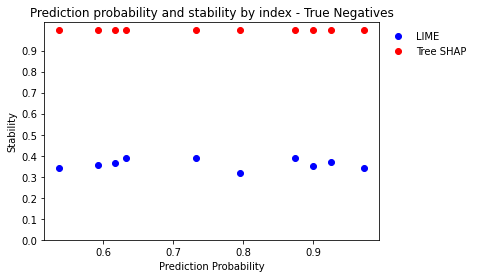

True Positives
Average LIME Stability: 0.37044216961683357
Average SHAP Stability: 1.0


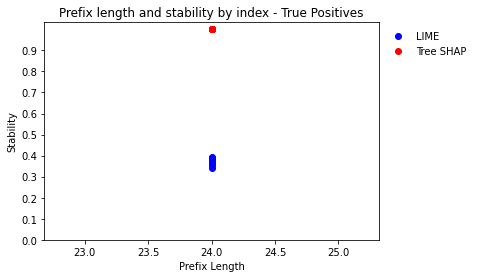

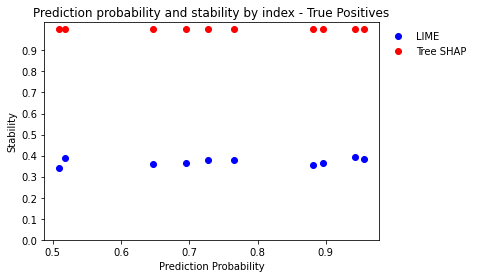

False Negatives
Average LIME Stability: 0.3675347977536076
Average SHAP Stability: 1.0


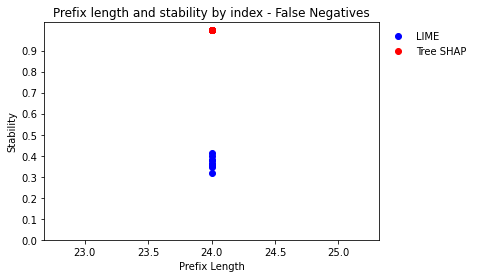

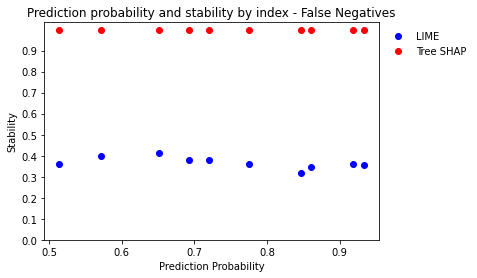

False Positives
Average LIME Stability: 0.38475538494348466
Average SHAP Stability: 1.0


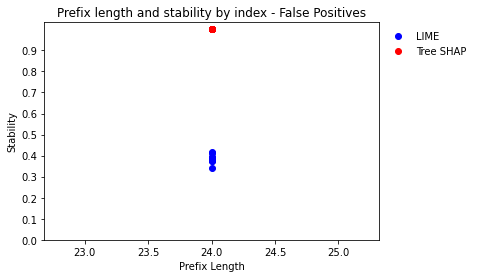

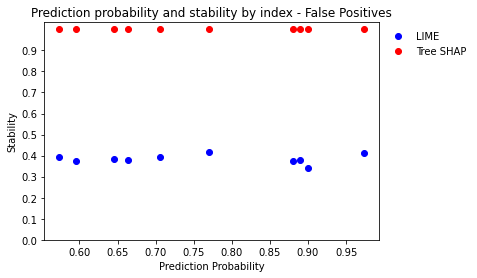

Bucket 25
True Negatives
Average LIME Stability: 0.1340981346309812
Average SHAP Stability: 1.0


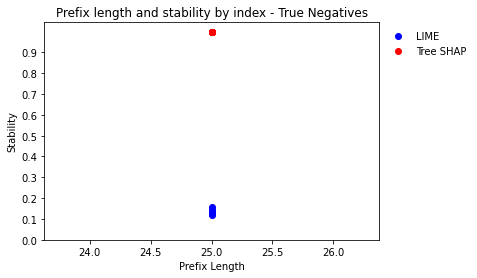

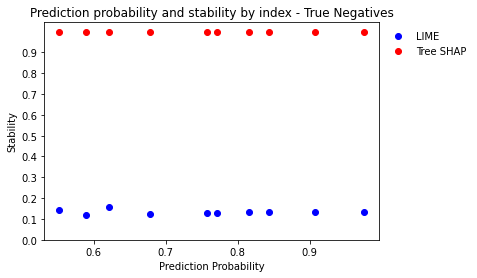

True Positives
Average LIME Stability: 0.13409813463098122
Average SHAP Stability: 1.0


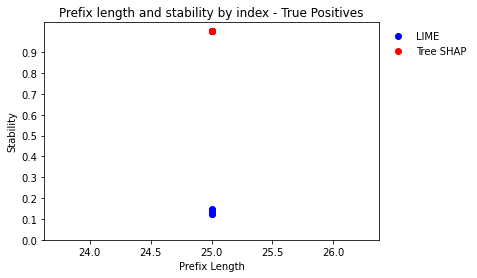

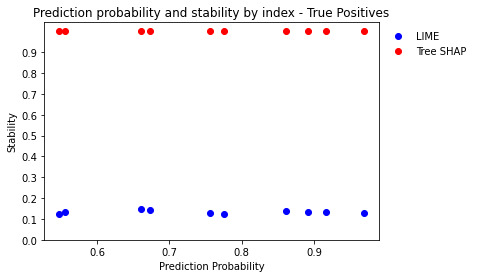

False Negatives
Average LIME Stability: 0.13856961340902935
Average SHAP Stability: 1.0


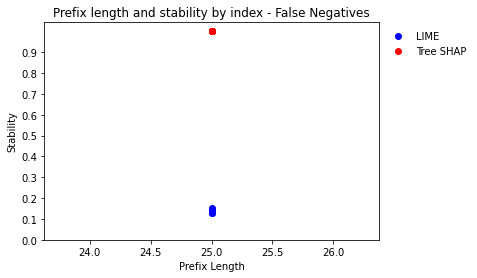

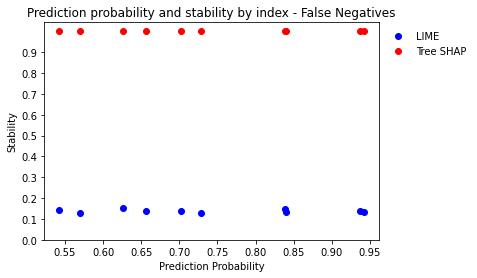

False Positives
Average LIME Stability: 0.13208596918085957
Average SHAP Stability: 1.0


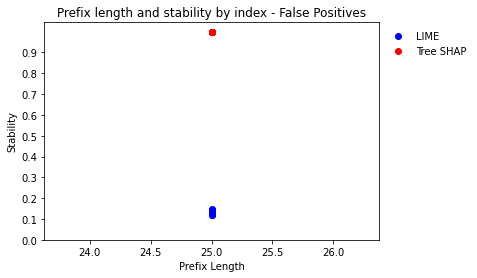

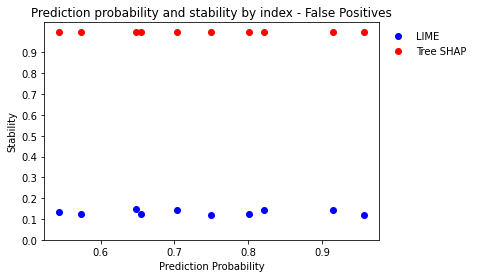

In [5]:
all_caseID = []
all_lengths = []
all_proba = []
all_lime_stab = []
all_shap_stab = []

for dataset_name in datasets:

    dataset_manager = DatasetManager(dataset_name)

    for ii in range(n_iter):
        num_buckets = len([name for name in os.listdir(os.path.join(PATH,'%s/%s_%s/models'% (dataset_ref, cls_method, method_name)))])
        
        if num_buckets < max_prefix:
            max_prefix = num_buckets
            
        buckets = range(0, max_prefix, gap)

        for bucket in buckets:
            bucketID = bucket+1
            print ('Bucket', bucketID)

            #import everything needed to sort and predict
            feat_comb_path = os.path.join(PATH, "%s/%s_%s/bucketers_and_encoders/feature_combiner_bucket_%s.joblib" % (dataset_ref, cls_method, method_name, bucketID))
            cls_path = os.path.join(PATH, "%s/%s_%s/models/cls_bucket_%s.joblib" % (dataset_ref, cls_method, method_name, bucketID))
            cls = joblib.load(cls_path)
            feature_combiner = joblib.load(feat_comb_path)

            #import previously identified samples
            tn_path = os.path.join(PATH, "%s/%s_%s/samples/true_neg_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            tp_path = os.path.join(PATH, "%s/%s_%s/samples/true_pos_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            fn_path = os.path.join(PATH, "%s/%s_%s/samples/false_neg_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            fp_path = os.path.join(PATH, "%s/%s_%s/samples/false_pos_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))

            sample_instances = []

            with open (tn_path, 'rb') as f:
                tn_list = pickle.load(f)
            with open (tp_path, 'rb') as f:
                tp_list = pickle.load(f)
            with open (fn_path, 'rb') as f:
                fn_list = pickle.load(f)
            with open (fp_path, 'rb') as f:
                fp_list = pickle.load(f)

            #save results to a list
            sample_instances.append(tn_list)
            sample_instances.append(tp_list)
            sample_instances.append(fn_list)
            sample_instances.append(fp_list)
            
            type_list = ["True Negatives", "True Positives", "False Negatives", "False Positives"]
            
            for i in range(len(sample_instances)):
                print (type_list[i])
                data = pd.DataFrame.from_records(sample_instances[i])
                
                case_id = pd.Series(data['caseID'])
                nr_events = pd.Series(data['nr_events'])
                proba = pd.Series(data['proba'])
                lime_stability = pd.Series(data['lime_stability'])
                tree_shap_stability = pd.Series(data['tree_shap_stability'])
                
                all_caseID.extend(case_id)
                all_lengths.extend(nr_events)
                all_proba.extend(proba)
                all_lime_stab.extend(lime_stability)
                all_shap_stab.extend(tree_shap_stability)
                
                print("Average LIME Stability:", statistics.mean(lime_stability))
                print("Average SHAP Stability:", statistics.mean(tree_shap_stability))
                
                fig, ax = plt.subplots()
                ax.plot(nr_events, lime_stability, 'bo', label = "LIME")
                ax.plot(nr_events, tree_shap_stability, 'ro', label = "Tree SHAP")
                ax.set_xlabel("Prefix Length")
                ax.set_ylabel("Stability")
                ax.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                plt.yticks(np.arange(0,1, 0.1))
                plt.title("Prefix length and stability by index - "+type_list[i])
                plt.show()
                
                fig2, ax2 = plt.subplots()
                ax2.plot(proba, lime_stability, 'bo', label = "LIME")
                ax2.plot(proba, tree_shap_stability, 'ro', label = "Tree SHAP")
                ax2.set_xlabel("Prediction Probability")
                ax2.set_ylabel("Stability")
                ax2.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                plt.yticks(np.arange(0,1, 0.1))
                plt.title("Prediction probability and stability by index - "+type_list[i])
                plt.show()

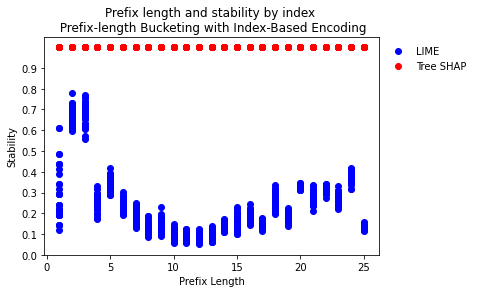

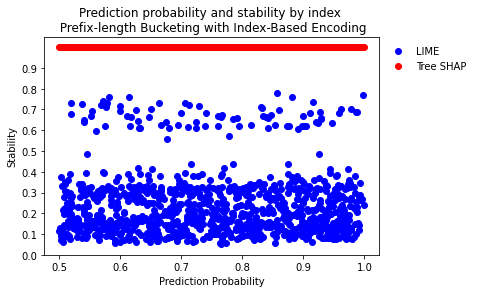

In [6]:
fig, ax = plt.subplots()
ax.plot(all_lengths, all_lime_stab, 'bo', label = "LIME")
ax.plot(all_lengths, all_shap_stab, 'ro', label = "Tree SHAP")
ax.set_xlabel("Prefix Length")
ax.set_ylabel("Stability")
ax.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
plt.yticks(np.arange(0,1, 0.1))
plt.title("Prefix length and stability by index \n Prefix-length Bucketing with Index-Based Encoding")
plt.show()

fig2, ax2 = plt.subplots()
ax2.plot(all_proba, all_lime_stab, 'bo', label = "LIME")
ax2.plot(all_proba, all_shap_stab, 'ro', label = "Tree SHAP")
ax2.set_xlabel("Prediction Probability")
ax2.set_ylabel("Stability")
ax2.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
plt.yticks(np.arange(0,1, 0.1))
plt.title("Prediction probability and stability by index \n Prefix-length Bucketing with Index-Based Encoding")
plt.show()

Bucket 1
True Negatives
Average LIME Weights Stability: 0.004573243141701644
Average SHAP Weights Stability: 4.252917797207952e-16
10


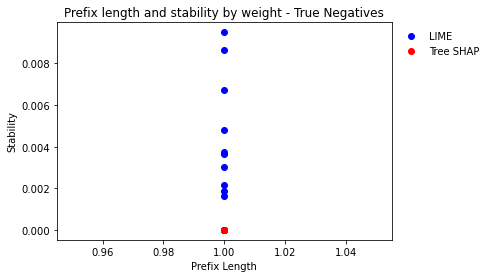

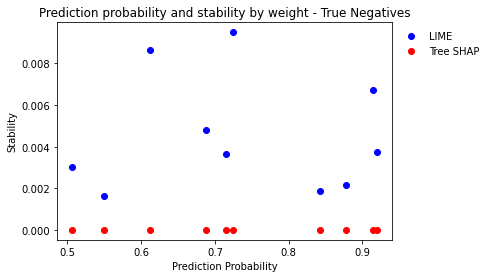

True Positives
Average LIME Weights Stability: 0.013457188510637551
Average SHAP Weights Stability: 4.71912305536393e-16
9


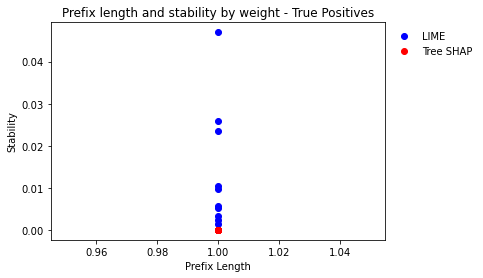

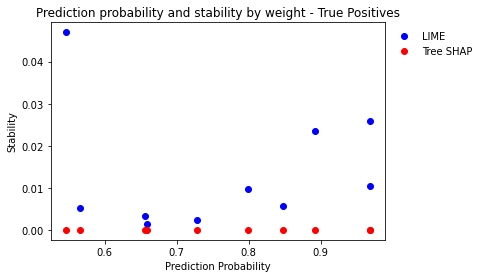

False Negatives
Average LIME Weights Stability: 0.015314979264468767
Average SHAP Weights Stability: 7.918447497189187e-16
10


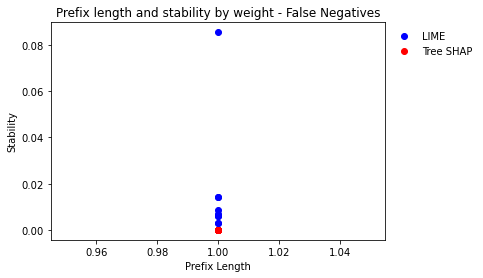

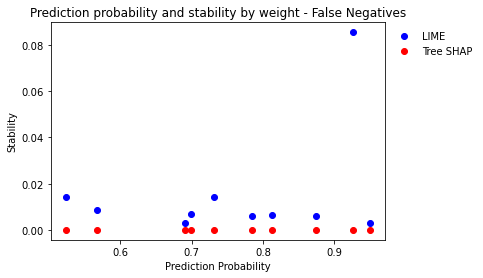

False Positives
Average LIME Weights Stability: 0.005784414870164203
Average SHAP Weights Stability: 7.357469321113414e-16
10


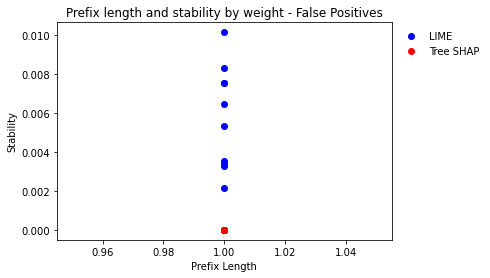

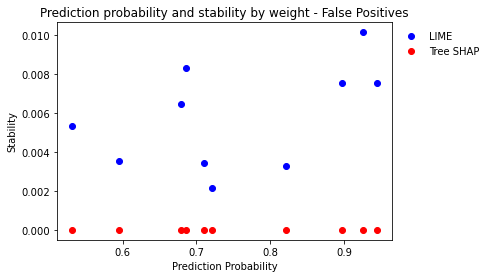

Bucket 2
True Negatives
Average LIME Weights Stability: 0.007900272271534161
Average SHAP Weights Stability: 4.460008706404718e-16
10


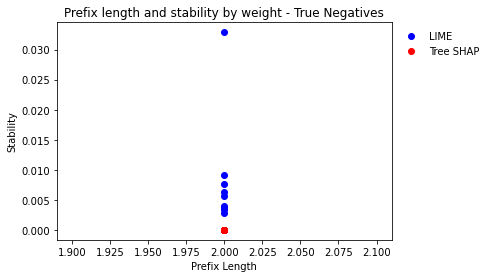

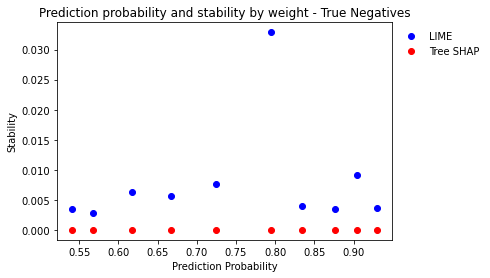

True Positives
Average LIME Weights Stability: 0.00549368120073233
Average SHAP Weights Stability: 5.066571080104484e-16
10


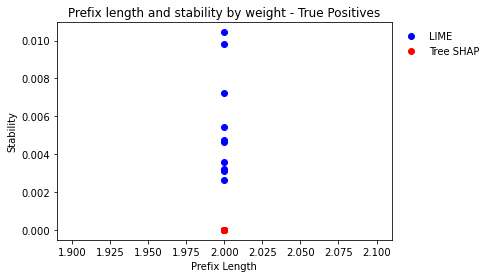

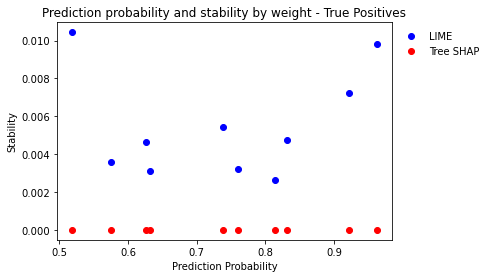

False Negatives
Average LIME Weights Stability: 0.013433728325936136
Average SHAP Weights Stability: 3.6853919716985665e-16
10


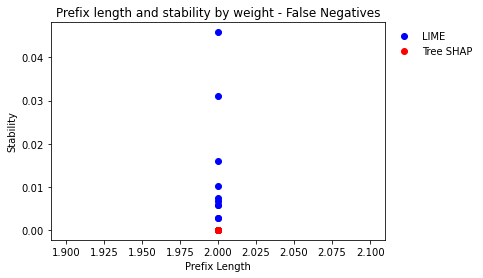

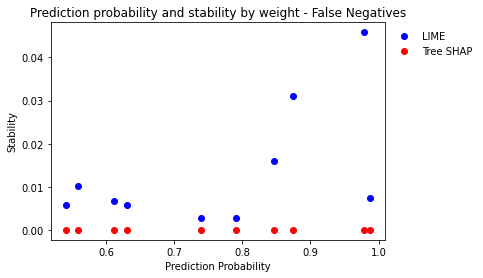

False Positives
Average LIME Weights Stability: 0.01002237776960623
Average SHAP Weights Stability: 3.7857253952432885e-16
10


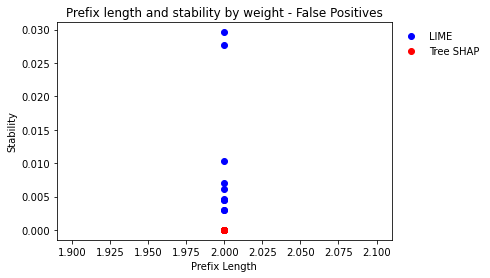

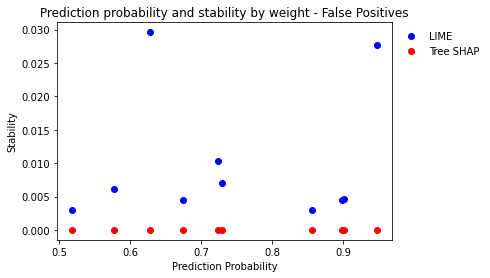

Bucket 3
True Negatives
Average LIME Weights Stability: 0.30350804028554984
Average SHAP Weights Stability: 2.7061606503386315e-16
10


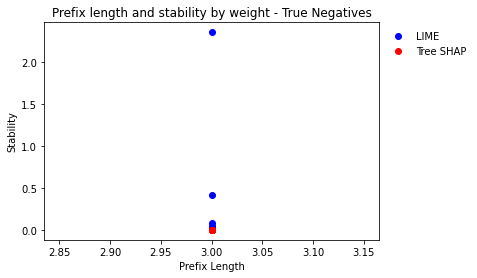

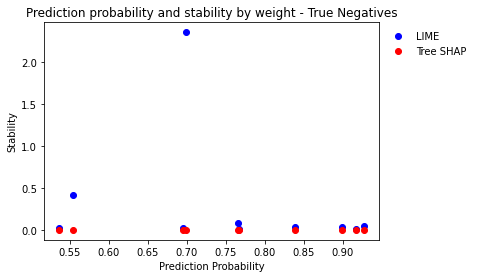

True Positives
Average LIME Weights Stability: 0.029859643381672546
Average SHAP Weights Stability: 2.6739269687570756e-16
10


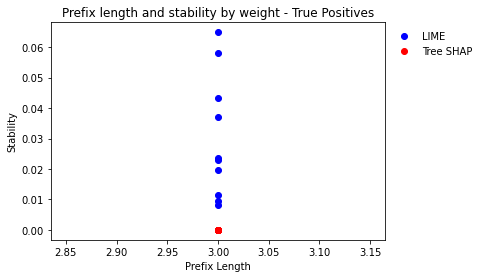

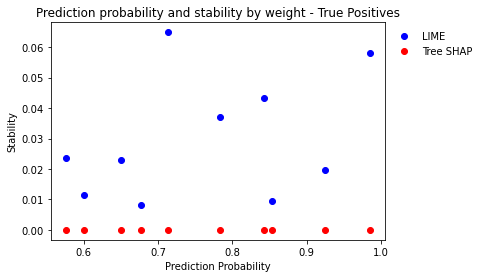

False Negatives
Average LIME Weights Stability: 0.06477117128512011
Average SHAP Weights Stability: 3.8034810460396294e-16
10


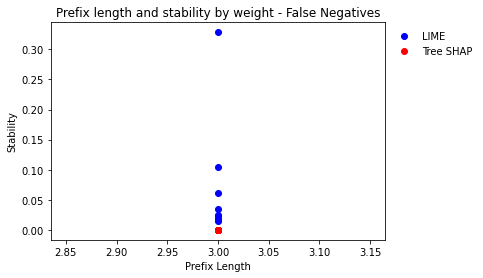

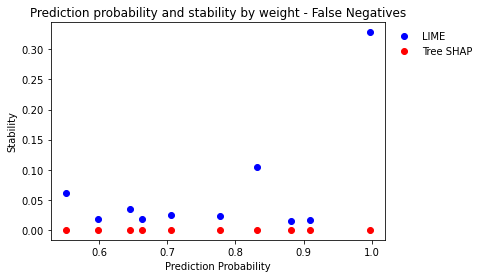

False Positives
Average LIME Weights Stability: 0.05155665376253367
Average SHAP Weights Stability: 2.768068193065674e-16
10


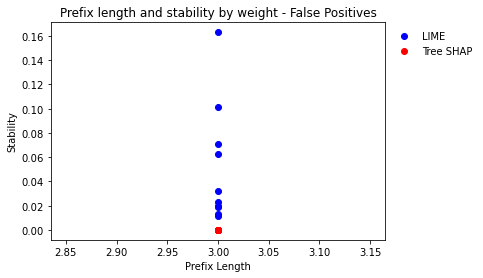

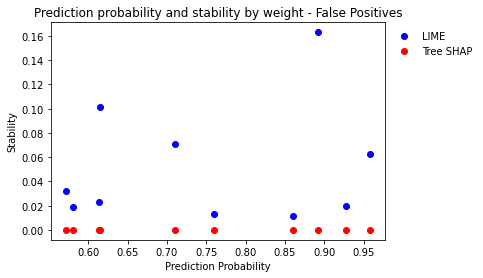

Bucket 4
True Negatives
Average LIME Weights Stability: 0.26526983174598634
Average SHAP Weights Stability: 1.0293043042416733e-16
10


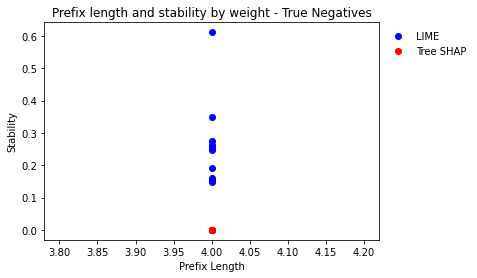

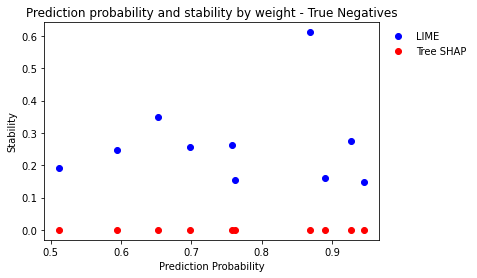

True Positives
Average LIME Weights Stability: 0.7262968868709525
Average SHAP Weights Stability: 1.379497247190404e-16
10


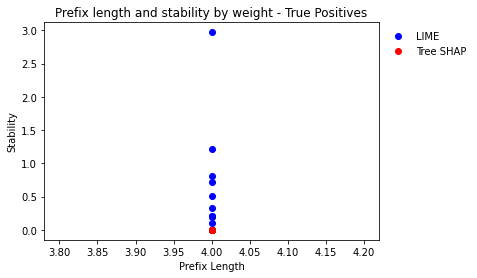

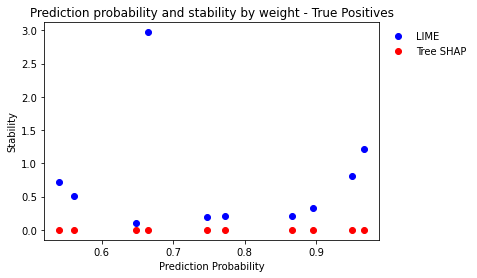

False Negatives
Average LIME Weights Stability: 1.0545899481887575
Average SHAP Weights Stability: 1.194775809119926e-16
10


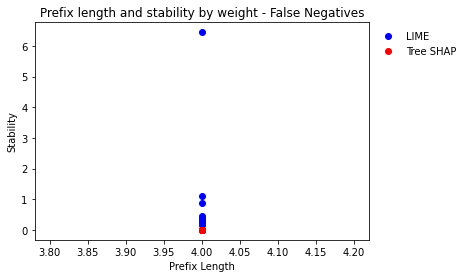

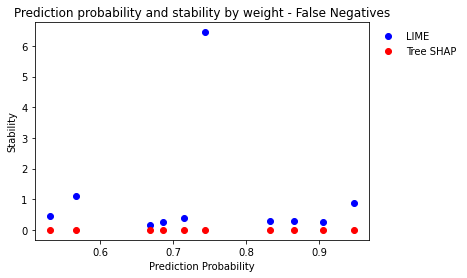

False Positives
Average LIME Weights Stability: 0.24109677885564004
Average SHAP Weights Stability: 1.8429854935722156e-16
10


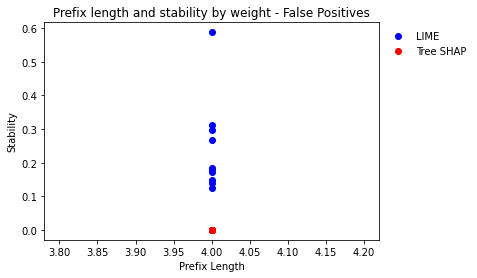

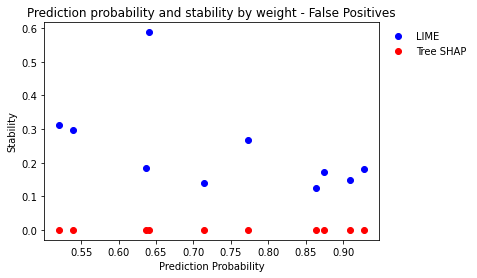

Bucket 5
True Negatives
Average LIME Weights Stability: 1.1265459190760108
Average SHAP Weights Stability: 1.1092390459115857e-16
10


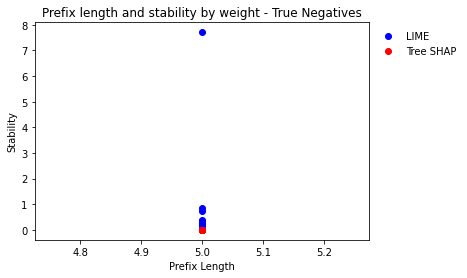

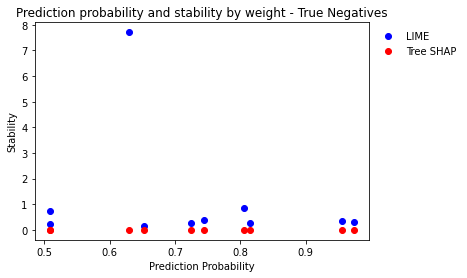

True Positives
Average LIME Weights Stability: 0.3658722087666347
Average SHAP Weights Stability: 1.0178281087624596e-16
10


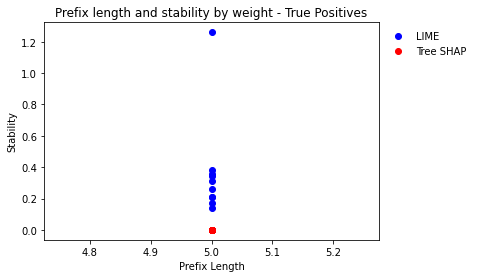

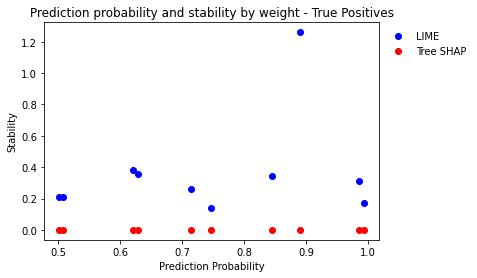

False Negatives
Average LIME Weights Stability: 0.49964126619238014
Average SHAP Weights Stability: 1.1058766327203612e-16
10


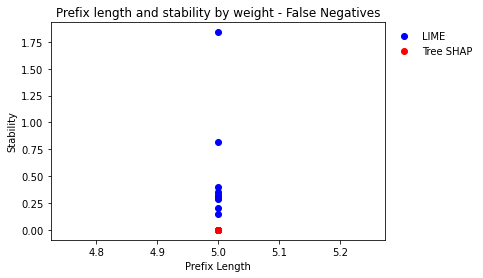

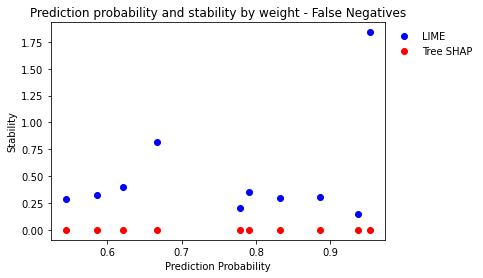

False Positives
Average LIME Weights Stability: 0.36630690847849484
Average SHAP Weights Stability: 1.015694871371958e-16
10


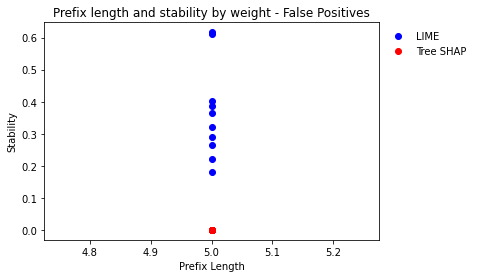

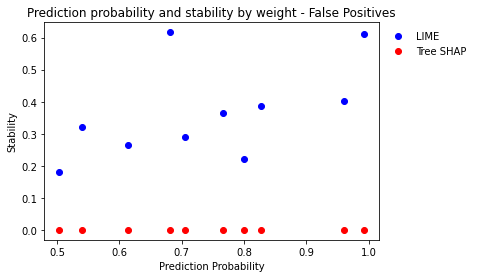

Bucket 6
True Negatives
Average LIME Weights Stability: 2.462472016793283
Average SHAP Weights Stability: 7.774097002964085e-17
10


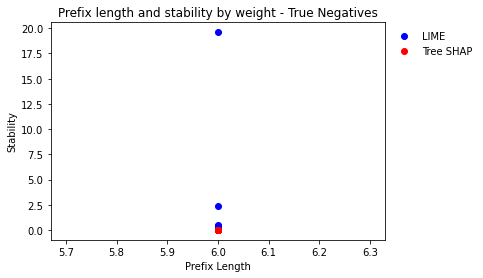

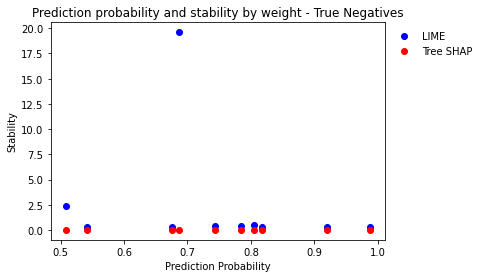

True Positives
Average LIME Weights Stability: 0.3339922877129842
Average SHAP Weights Stability: 8.1526842306235e-17
10


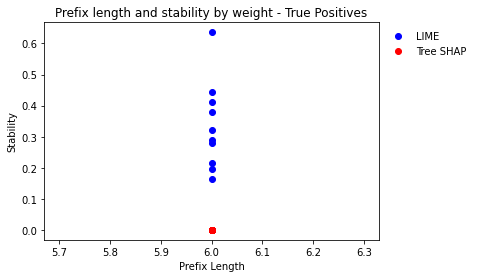

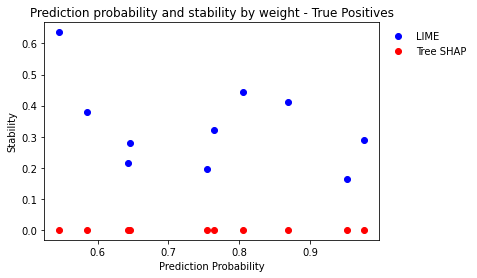

False Negatives
Average LIME Weights Stability: 0.5389912065028495
Average SHAP Weights Stability: 7.626834618319326e-17
10


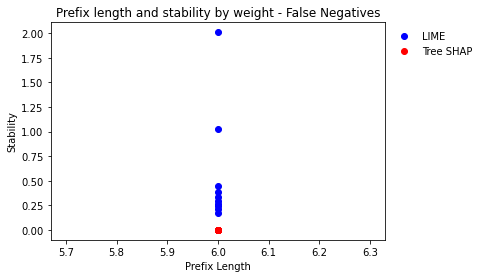

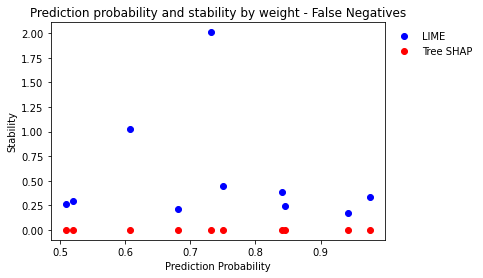

False Positives
Average LIME Weights Stability: 3.2330554755771588
Average SHAP Weights Stability: 8.137422617202427e-17
10


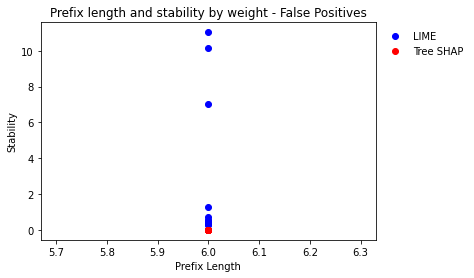

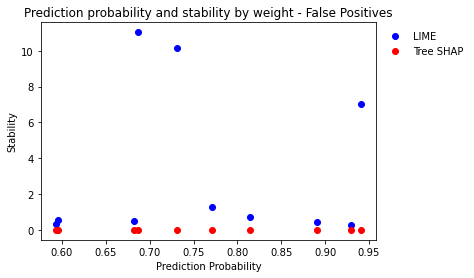

Bucket 7
True Negatives
Average LIME Weights Stability: 0.49391900124672644
Average SHAP Weights Stability: 6.327309192265061e-17
10


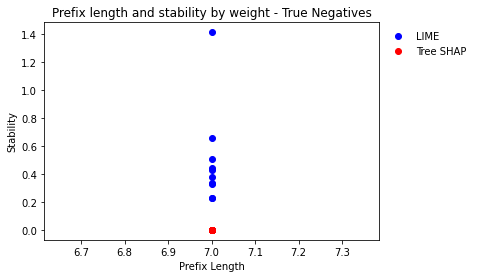

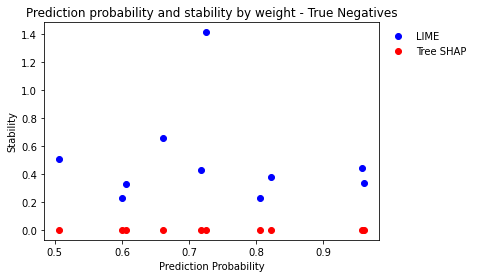

True Positives
Average LIME Weights Stability: 0.4867651512680318
Average SHAP Weights Stability: 5.4037059606603286e-17
10


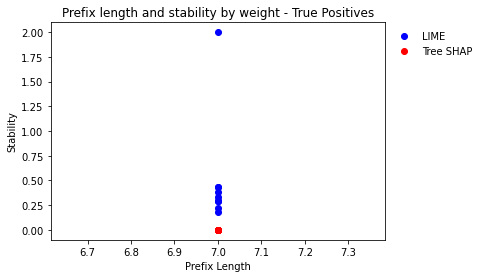

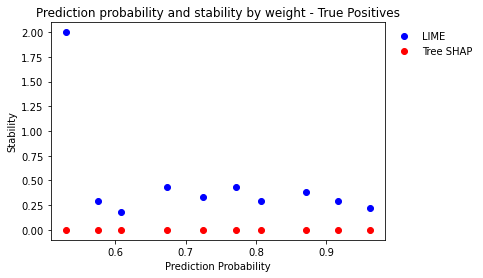

False Negatives
Average LIME Weights Stability: 0.40781499146873745
Average SHAP Weights Stability: 5.976862367780313e-17
10


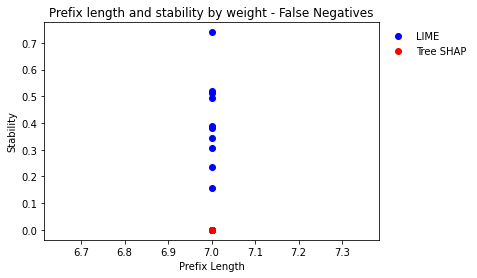

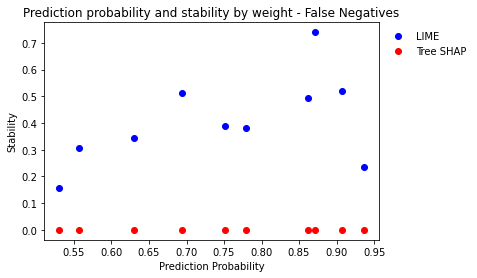

False Positives
Average LIME Weights Stability: 2.702799359306703
Average SHAP Weights Stability: 6.088988543064347e-17
10


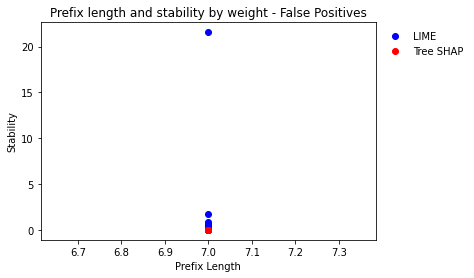

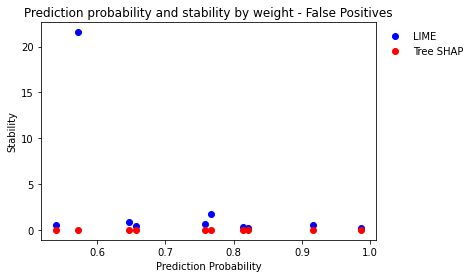

Bucket 8
True Negatives
Average LIME Weights Stability: 0.5845492584884537
Average SHAP Weights Stability: 4.955617869980808e-17
10


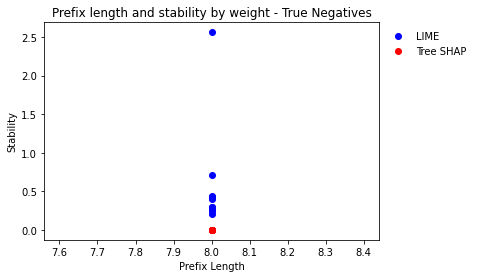

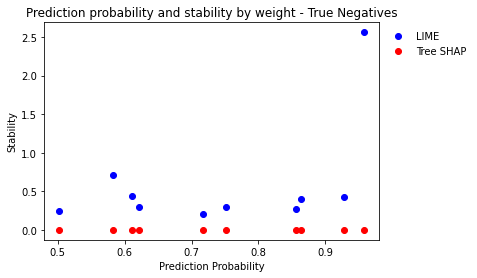

True Positives
Average LIME Weights Stability: 0.41973503203761475
Average SHAP Weights Stability: 5.353031734972349e-17
10


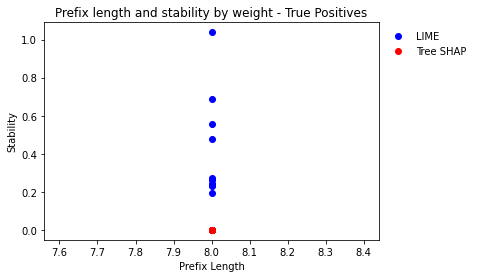

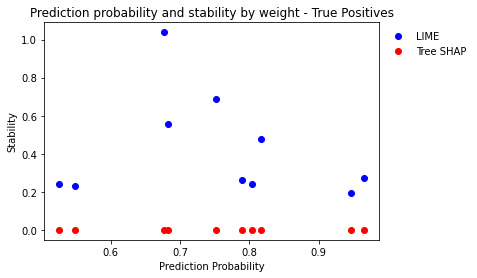

False Negatives
Average LIME Weights Stability: 0.3551052043217454
Average SHAP Weights Stability: 5.3598226252395595e-17
10


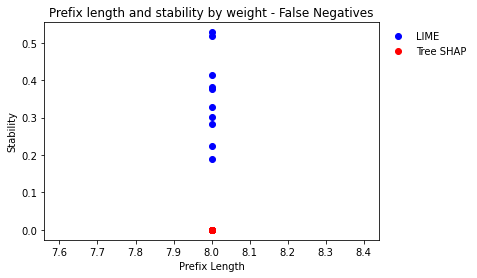

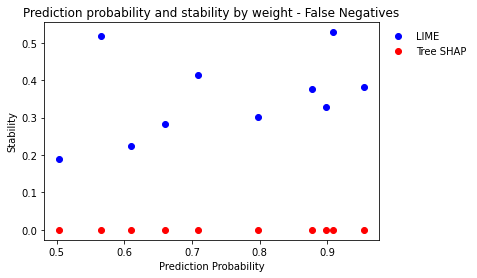

False Positives
Average LIME Weights Stability: 0.9402440544202528
Average SHAP Weights Stability: 6.004067510023278e-17
10


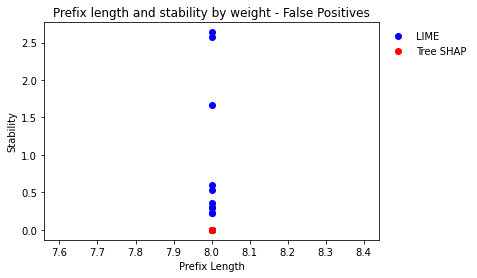

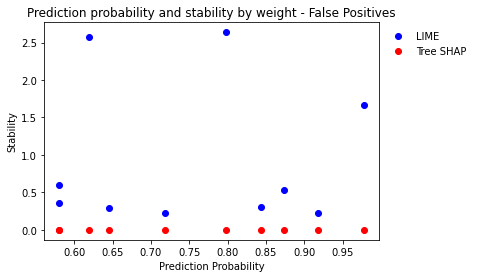

Bucket 9
True Negatives
Average LIME Weights Stability: 0.3901997260356089
Average SHAP Weights Stability: 4.675578907754348e-17
10


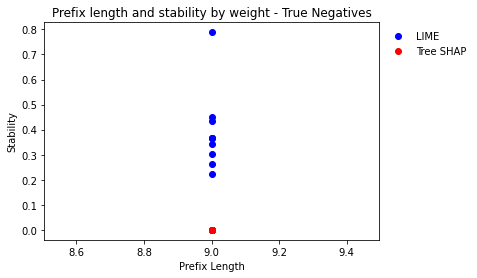

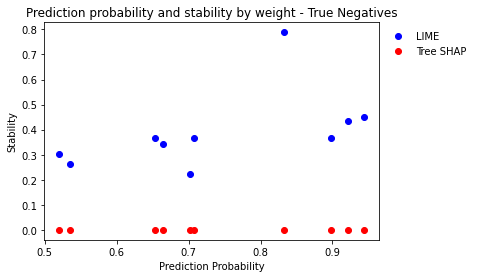

True Positives
Average LIME Weights Stability: 0.3615337298846587
Average SHAP Weights Stability: 4.370694137735821e-17
10


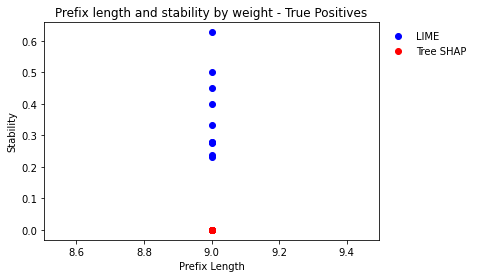

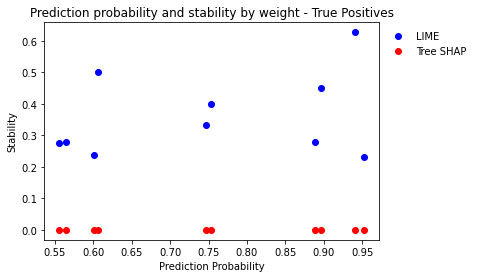

False Negatives
Average LIME Weights Stability: 1.9098246599649764
Average SHAP Weights Stability: 4.936032661099763e-17
10


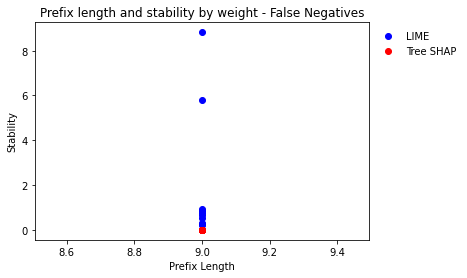

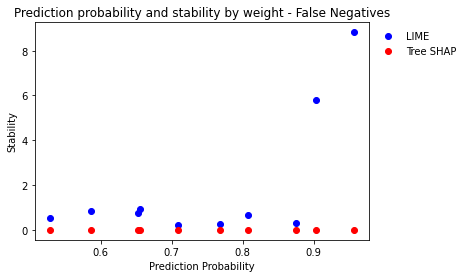

False Positives
Average LIME Weights Stability: 0.6409110408476714
Average SHAP Weights Stability: 4.585239660190064e-17
10


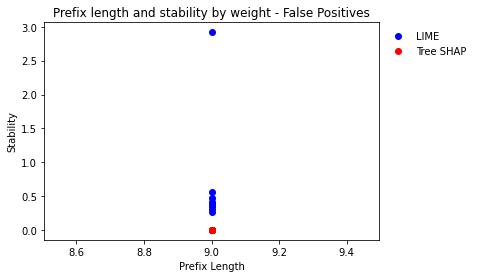

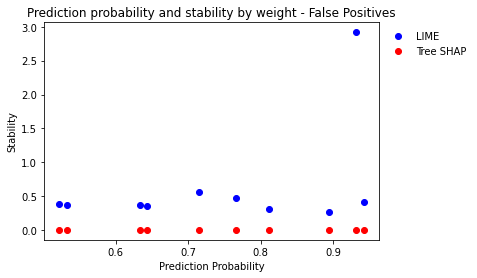

Bucket 10
True Negatives
Average LIME Weights Stability: 1.1520043848572774
Average SHAP Weights Stability: 3.414671358078734e-17
10


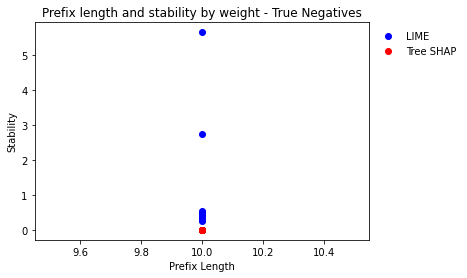

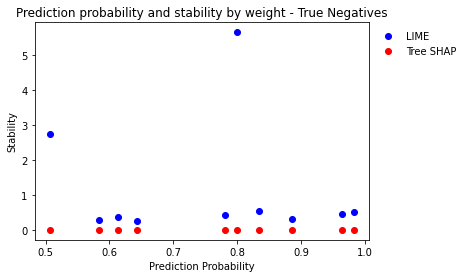

True Positives
Average LIME Weights Stability: 0.9018760610236426
Average SHAP Weights Stability: 4.45430295600343e-17
10


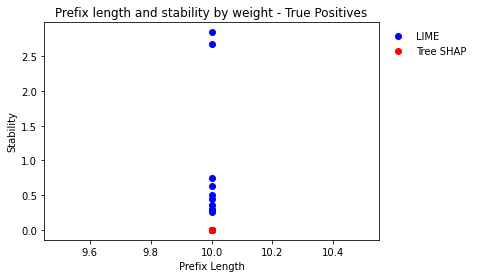

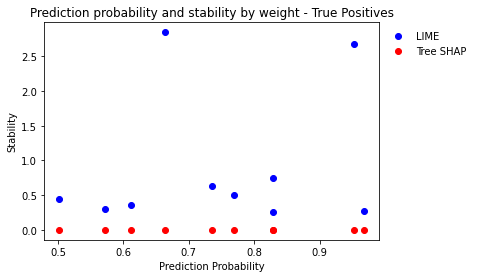

False Negatives
Average LIME Weights Stability: 0.49053370517222733
Average SHAP Weights Stability: 3.856394886942967e-17
10


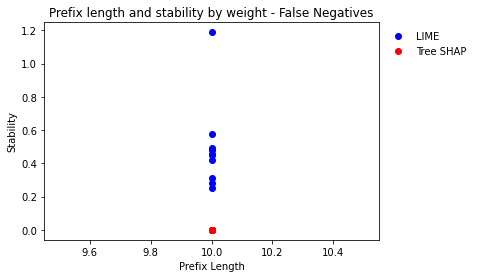

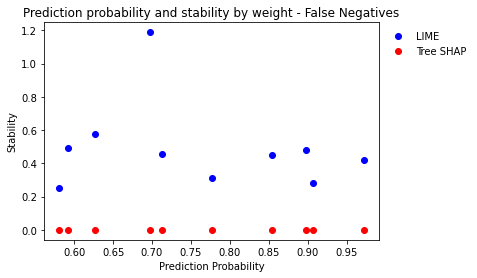

False Positives
Average LIME Weights Stability: 0.38078269119329927
Average SHAP Weights Stability: 3.871670705720725e-17
10


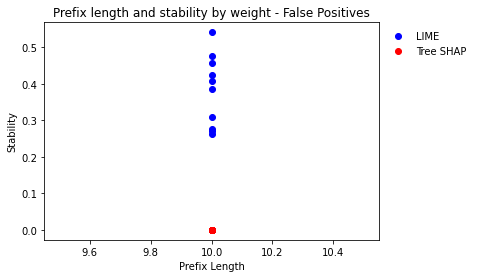

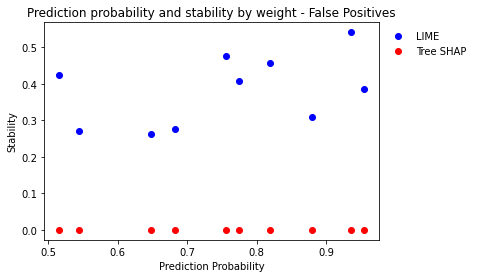

Bucket 11
True Negatives
Average LIME Weights Stability: 0.5843120391130698
Average SHAP Weights Stability: 4.0905675498083754e-17
10


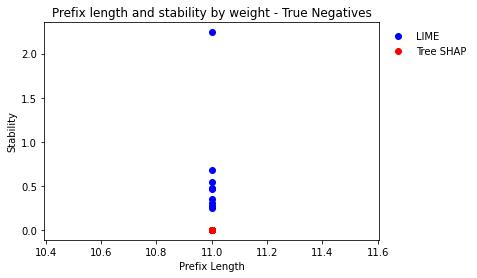

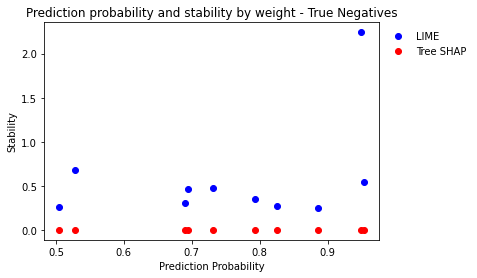

True Positives
Average LIME Weights Stability: 0.6280247376387814
Average SHAP Weights Stability: 3.6182649447915776e-17
10


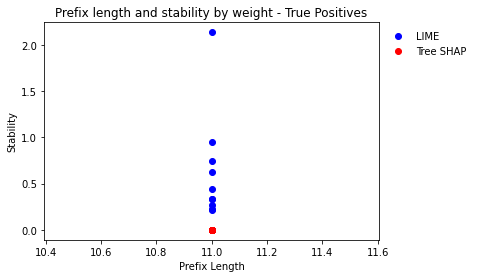

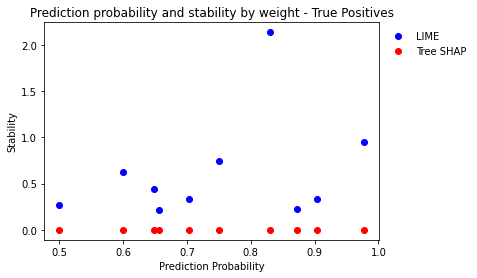

False Negatives
Average LIME Weights Stability: 0.4421575351742785
Average SHAP Weights Stability: 3.476416879605216e-17
10


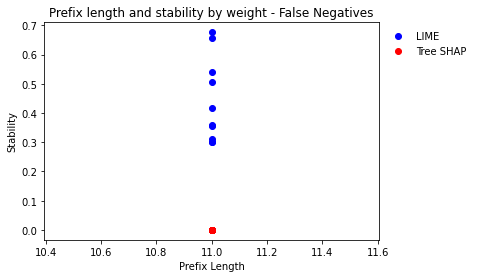

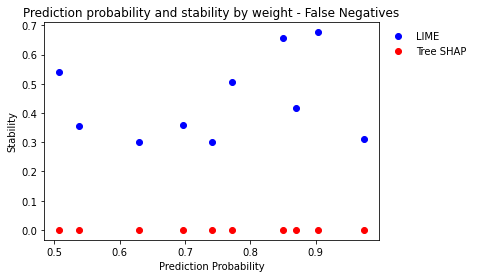

False Positives
Average LIME Weights Stability: 0.6698027685041181
Average SHAP Weights Stability: 3.749760759562006e-17
10


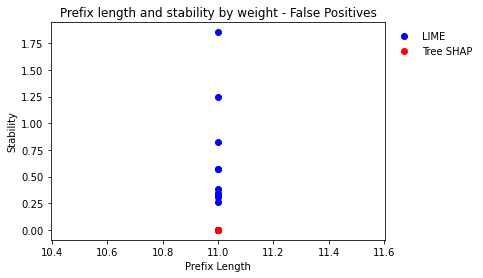

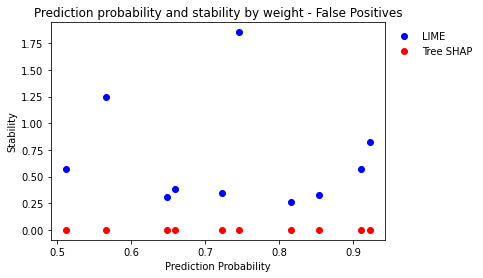

Bucket 12
True Negatives
Average LIME Weights Stability: 0.8992591987719352
Average SHAP Weights Stability: 3.119829901217541e-17
10


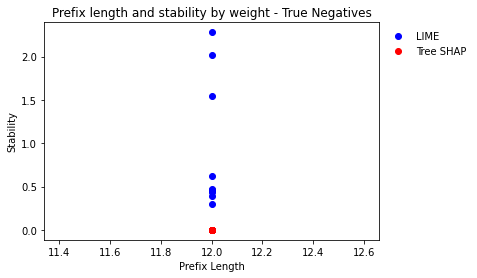

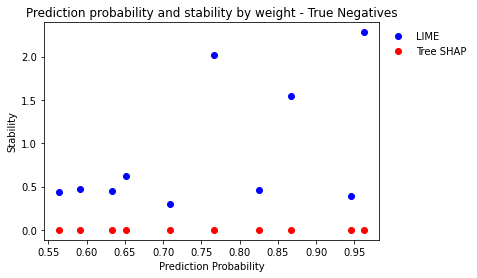

True Positives
Average LIME Weights Stability: 0.4472992050960576
Average SHAP Weights Stability: 3.602101555802633e-17
10


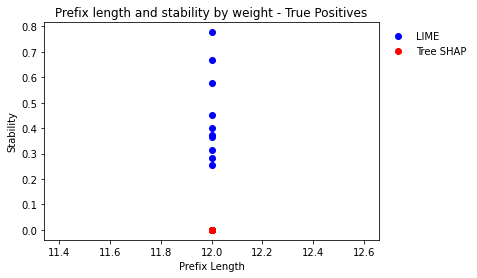

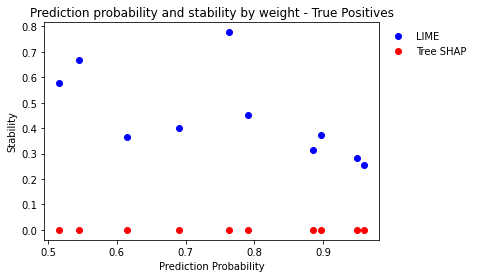

False Negatives
Average LIME Weights Stability: 0.9408412165153505
Average SHAP Weights Stability: 3.506891270273446e-17
10


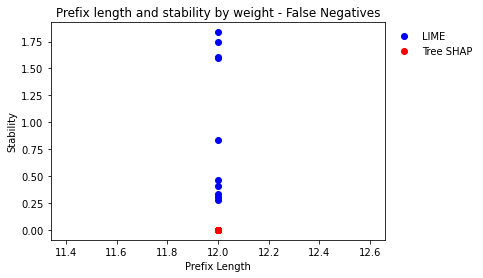

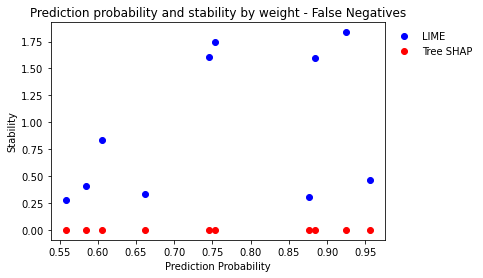

False Positives
Average LIME Weights Stability: 0.6646032641598254
Average SHAP Weights Stability: 3.034511499640835e-17
10


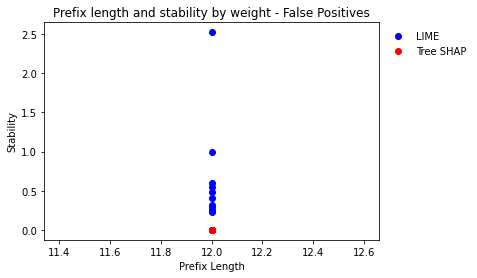

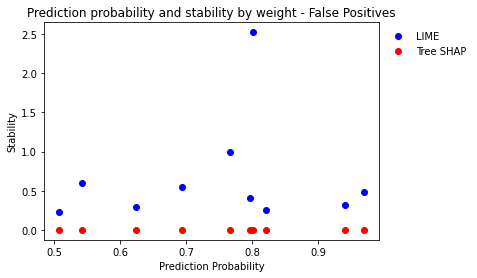

Bucket 13
True Negatives
Average LIME Weights Stability: 0.6574748617806997
Average SHAP Weights Stability: 2.9329058854062855e-17
10


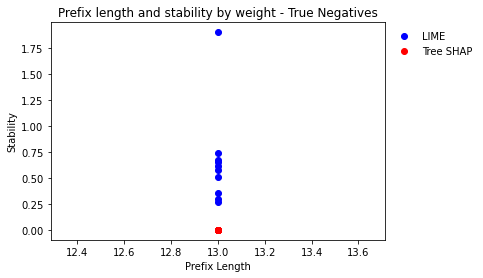

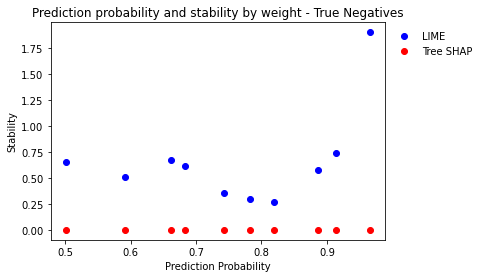

True Positives
Average LIME Weights Stability: 0.4520555574592174
Average SHAP Weights Stability: 3.083034080463708e-17
10


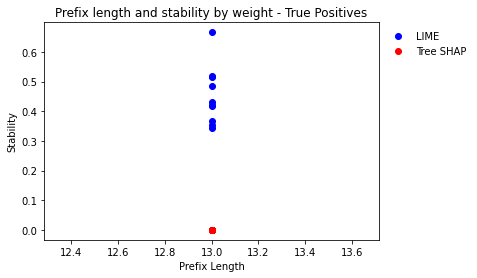

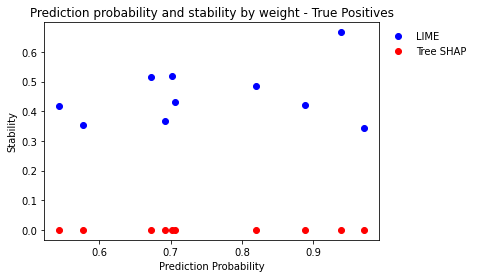

False Negatives
Average LIME Weights Stability: 0.7843701246723187
Average SHAP Weights Stability: 2.901482566392664e-17
10


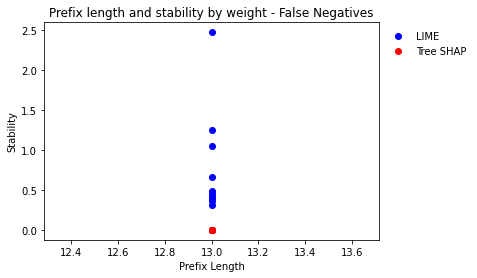

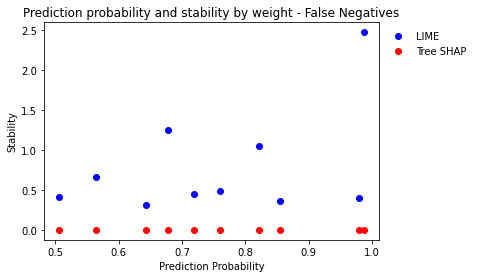

False Positives
Average LIME Weights Stability: 0.6898495946670868
Average SHAP Weights Stability: 2.5788164453841393e-17
10


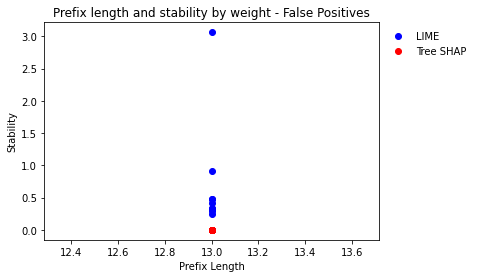

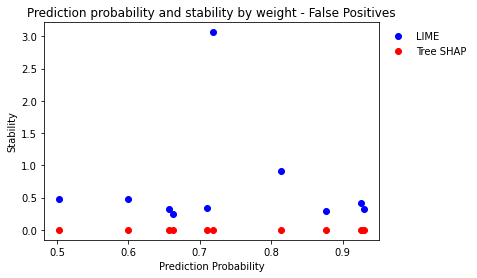

Bucket 14
True Negatives
Average LIME Weights Stability: 0.7412717470792112
Average SHAP Weights Stability: 2.448420774697841e-17
10


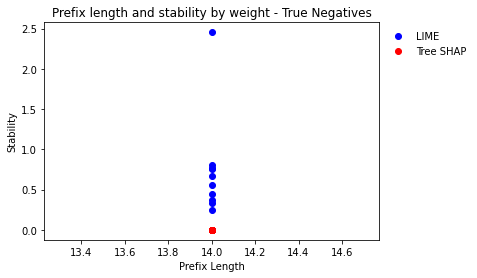

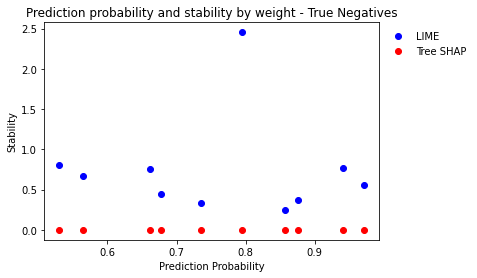

True Positives
Average LIME Weights Stability: 1.082399462373612
Average SHAP Weights Stability: 2.939655072566541e-17
10


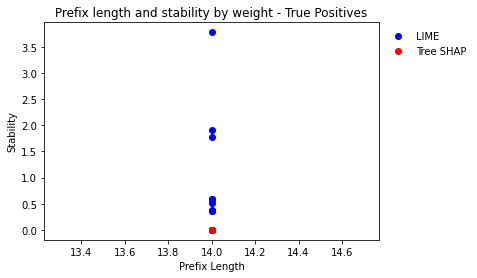

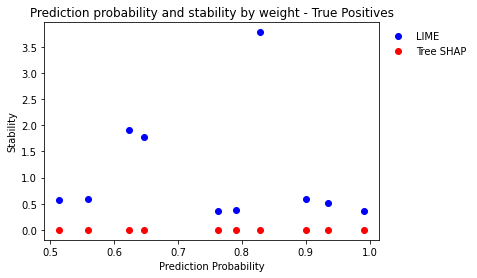

False Negatives
Average LIME Weights Stability: 0.5677115969338863
Average SHAP Weights Stability: 2.5130215660678412e-17
10


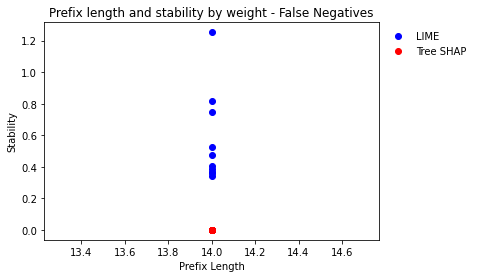

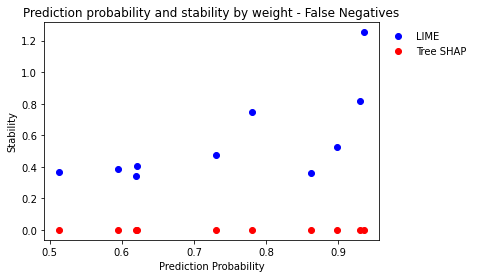

False Positives
Average LIME Weights Stability: 0.8814303451458095
Average SHAP Weights Stability: 2.784035031291435e-17
10


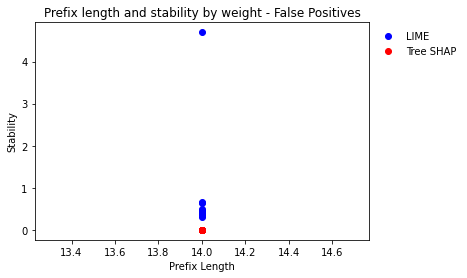

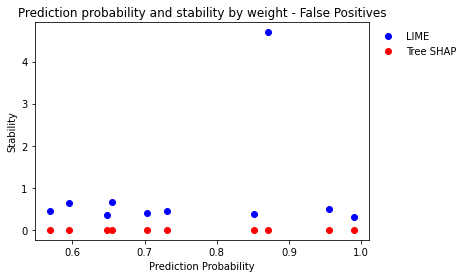

Bucket 15
True Negatives
Average LIME Weights Stability: 0.5788451692164924
Average SHAP Weights Stability: 3.021937698665076e-17
10


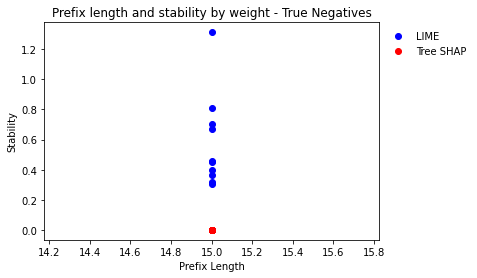

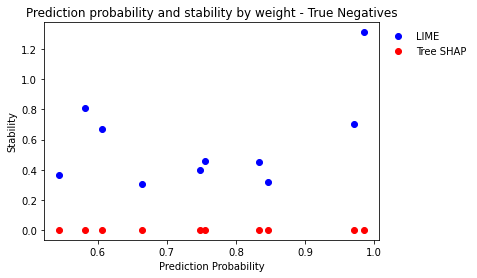

True Positives
Average LIME Weights Stability: 0.6542965746641779
Average SHAP Weights Stability: 2.6340473361120035e-17
10


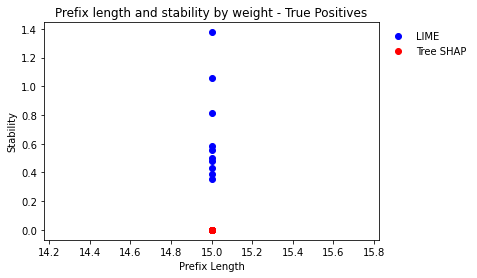

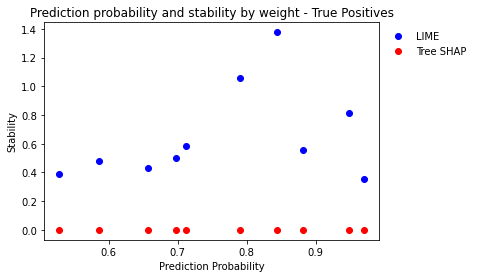

False Negatives
Average LIME Weights Stability: 0.97835791629226
Average SHAP Weights Stability: 2.5651163325744595e-17
10


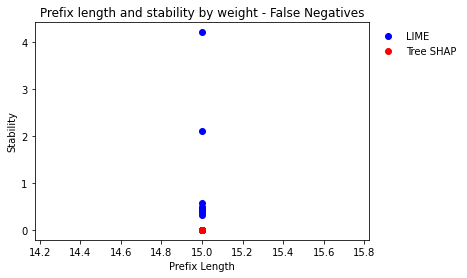

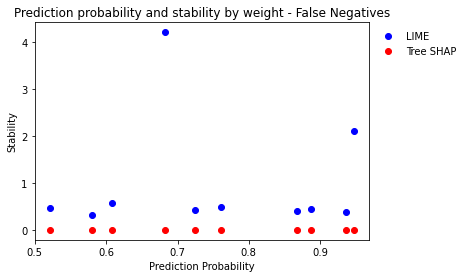

False Positives
Average LIME Weights Stability: 0.9936523048029243
Average SHAP Weights Stability: 2.5726756818948067e-17
10


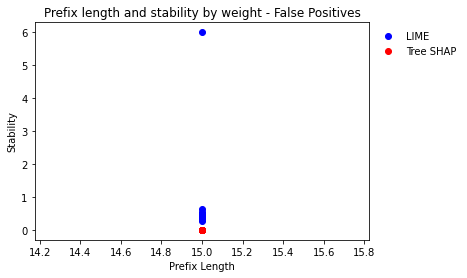

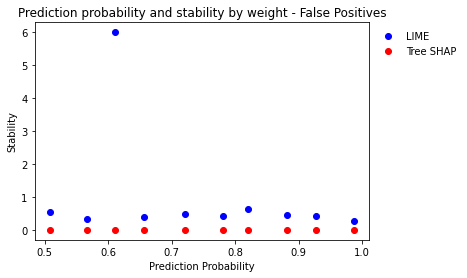

Bucket 16
True Negatives
Average LIME Weights Stability: 0.6513143589974385
Average SHAP Weights Stability: 2.992423660355964e-17
10


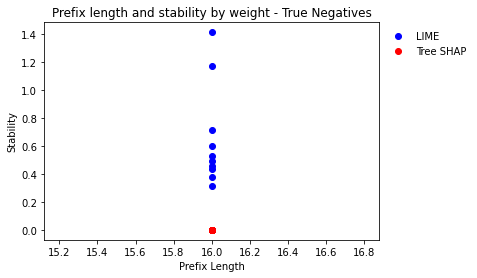

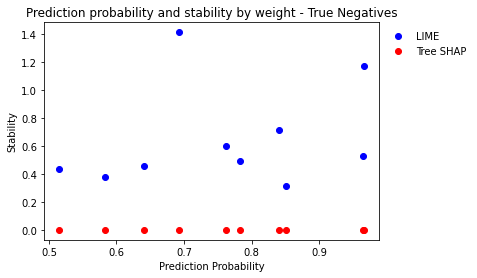

True Positives
Average LIME Weights Stability: 0.5697313020136131
Average SHAP Weights Stability: 2.7862245988775164e-17
10


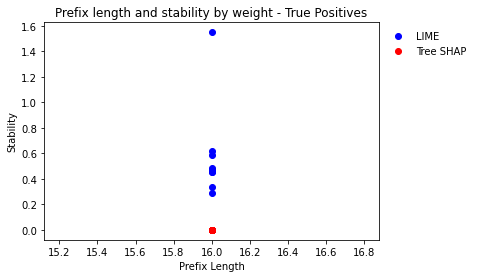

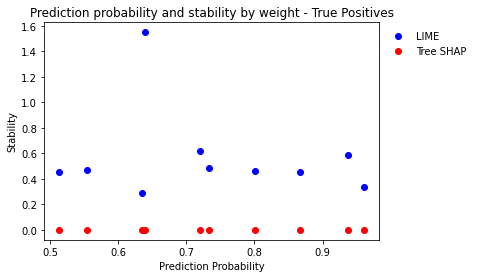

False Negatives
Average LIME Weights Stability: 1.0480416265854056
Average SHAP Weights Stability: 2.3385394569819724e-17
10


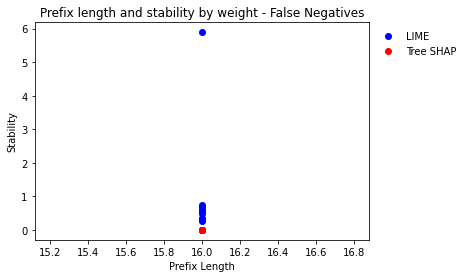

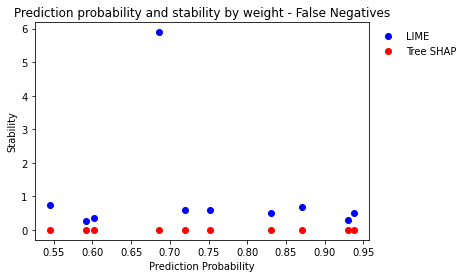

False Positives
Average LIME Weights Stability: 0.3977783734909723
Average SHAP Weights Stability: 2.4670945021307178e-17
10


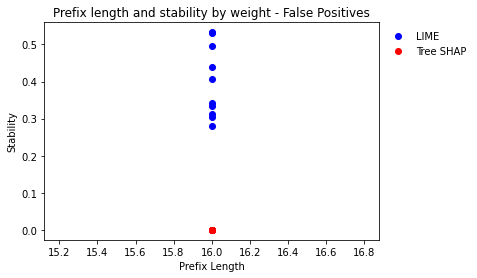

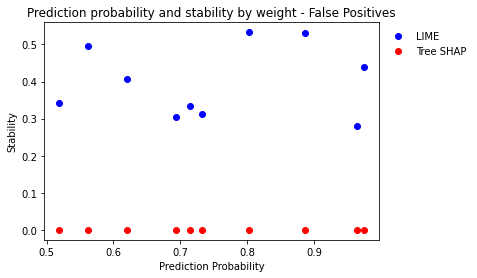

Bucket 17
True Negatives
Average LIME Weights Stability: 0.6636640565510432
Average SHAP Weights Stability: 2.811926450857762e-17
10


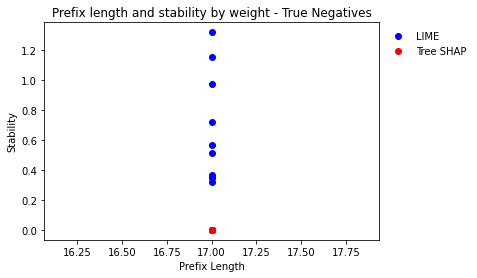

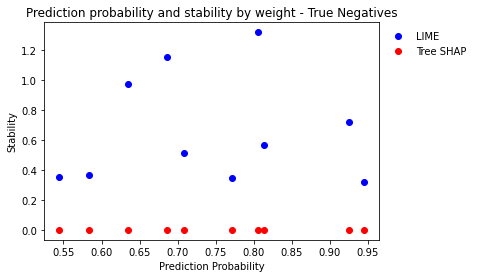

True Positives
Average LIME Weights Stability: 0.566781788096697
Average SHAP Weights Stability: 3.15752177088972e-17
10


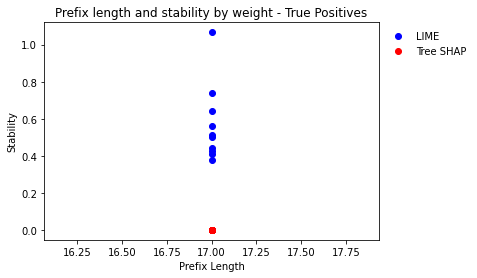

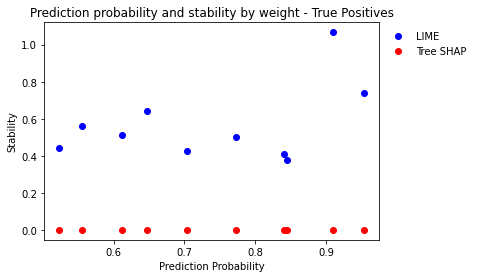

False Negatives
Average LIME Weights Stability: 0.4882792074658503
Average SHAP Weights Stability: 2.443342863371939e-17
10


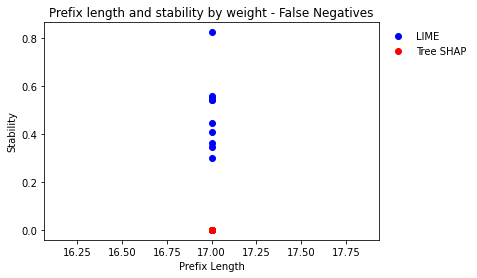

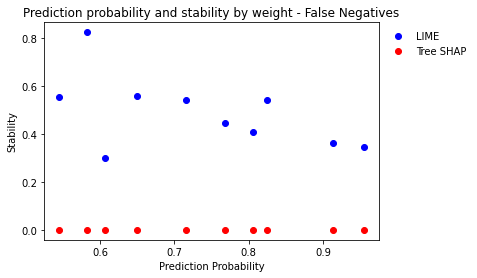

False Positives
Average LIME Weights Stability: 0.8195646409007022
Average SHAP Weights Stability: 2.5590142288210025e-17
10


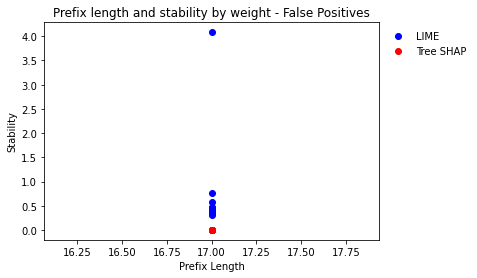

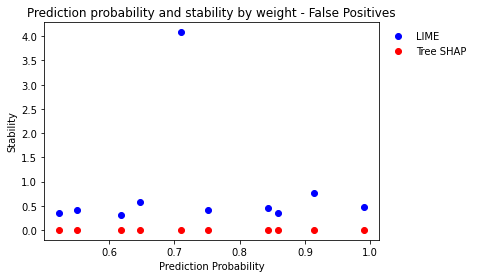

Bucket 18
True Negatives
Average LIME Weights Stability: 0.7705775907029402
Average SHAP Weights Stability: 2.533203993859236e-17
10


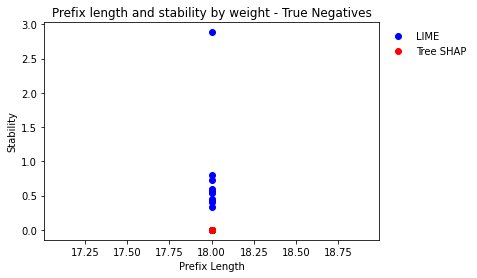

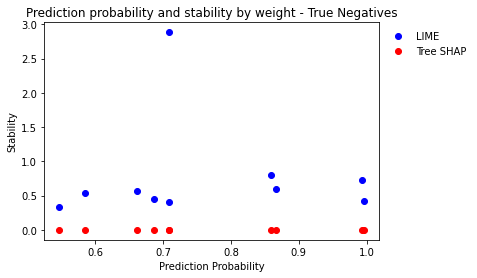

True Positives
Average LIME Weights Stability: 0.55499592277784
Average SHAP Weights Stability: 2.4102378215361348e-17
10


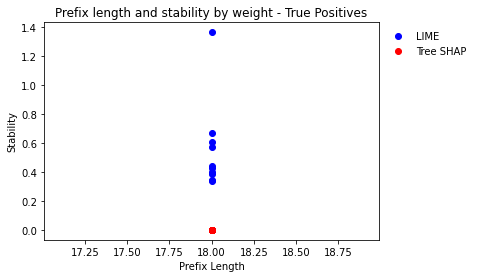

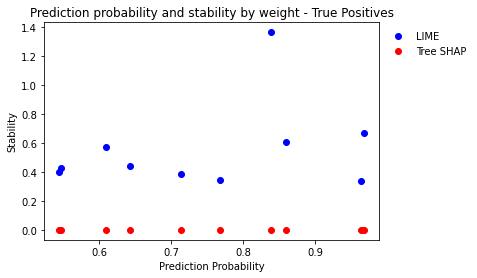

False Negatives
Average LIME Weights Stability: 0.7527881800988433
Average SHAP Weights Stability: 2.5255168377771523e-17
10


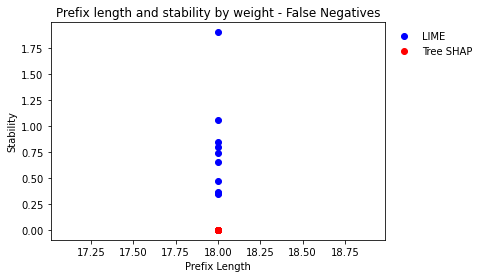

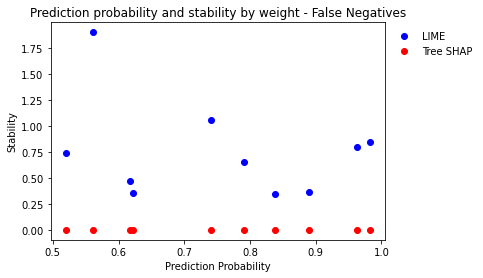

False Positives
Average LIME Weights Stability: 0.5856389764602878
Average SHAP Weights Stability: 2.2012660944588388e-17
10


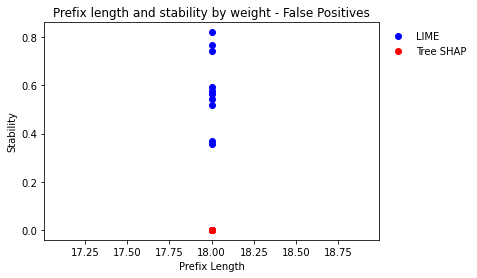

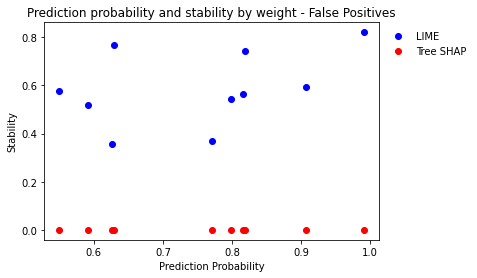

Bucket 19
True Negatives
Average LIME Weights Stability: 0.8800082023356669
Average SHAP Weights Stability: 2.3672785347733522e-17
10


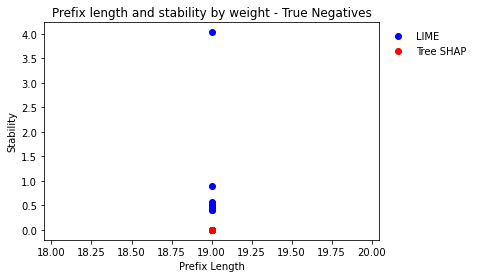

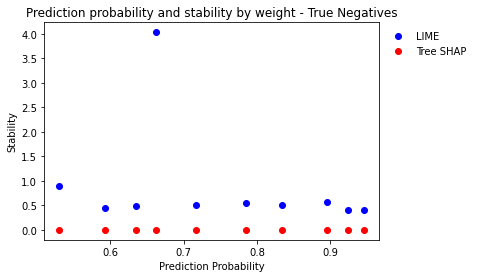

True Positives
Average LIME Weights Stability: 0.5525460536793384
Average SHAP Weights Stability: 2.2836706588451293e-17
10


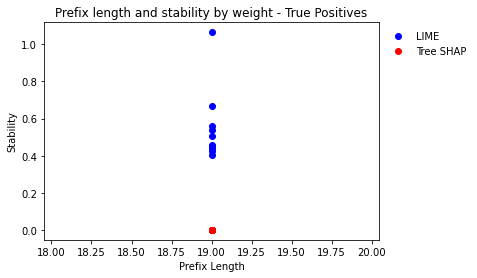

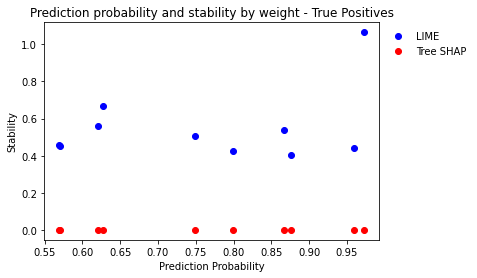

False Negatives
Average LIME Weights Stability: 0.8081396009760498
Average SHAP Weights Stability: 2.0741443535921264e-17
10


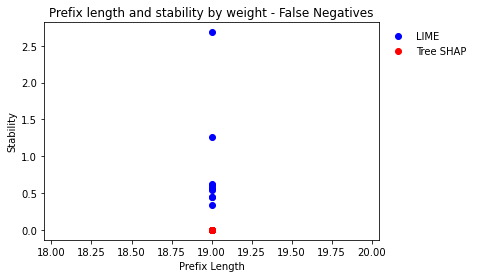

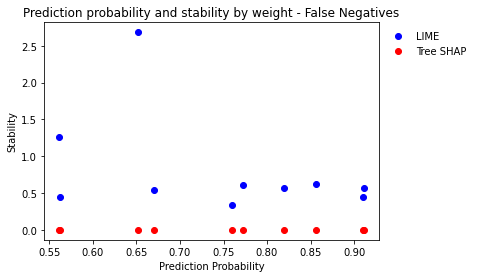

False Positives
Average LIME Weights Stability: 0.9039133185934063
Average SHAP Weights Stability: 2.2647093627518462e-17
10


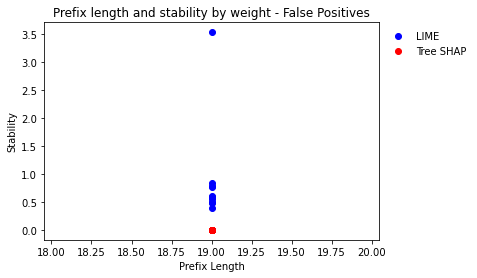

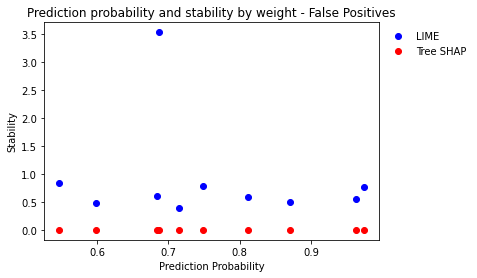

Bucket 20
True Negatives
Average LIME Weights Stability: 0.5148969342360047
Average SHAP Weights Stability: 2.156185033475574e-17
10


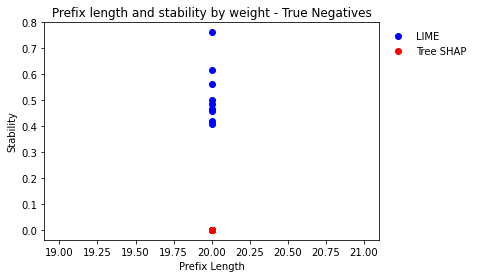

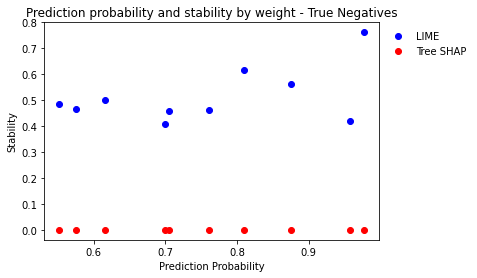

True Positives
Average LIME Weights Stability: 1.1118298020011554
Average SHAP Weights Stability: 2.2265417416341352e-17
10


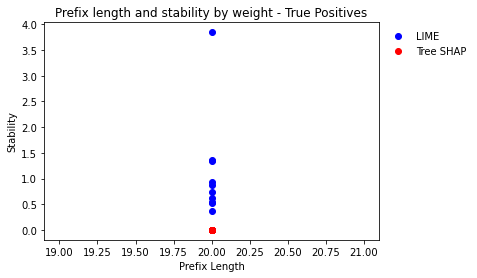

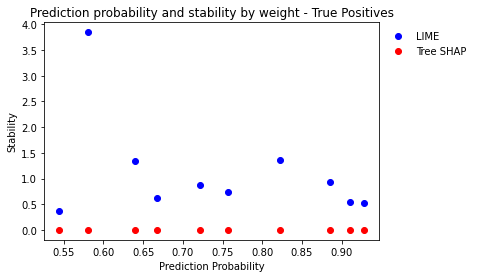

False Negatives
Average LIME Weights Stability: 0.8818781233221329
Average SHAP Weights Stability: 2.192539547245855e-17
10


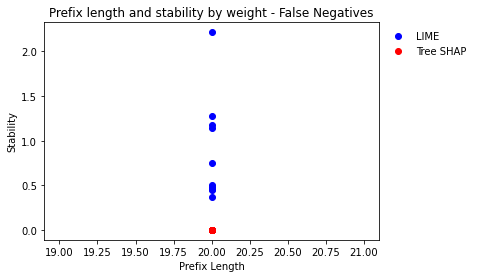

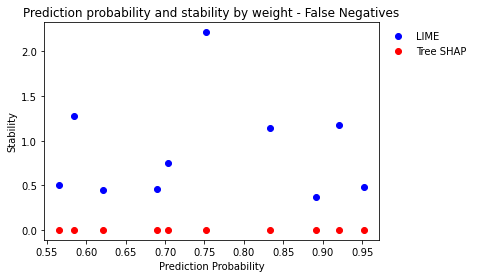

False Positives
Average LIME Weights Stability: 0.6687351318467052
Average SHAP Weights Stability: 2.2498448965363835e-17
10


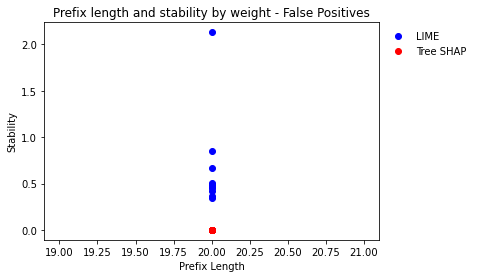

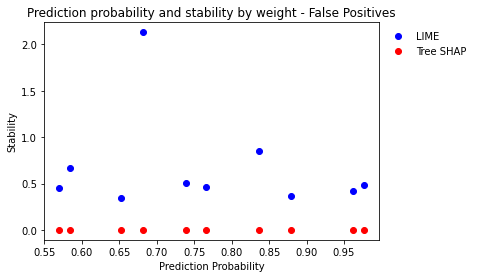

Bucket 21
True Negatives
Average LIME Weights Stability: 0.8216539930806791
Average SHAP Weights Stability: 2.0346656833567547e-17
10


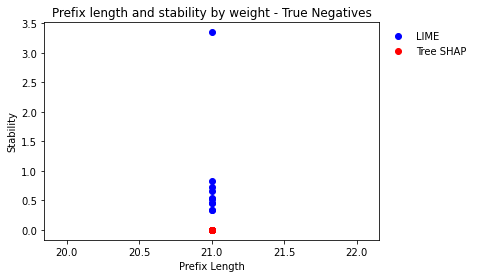

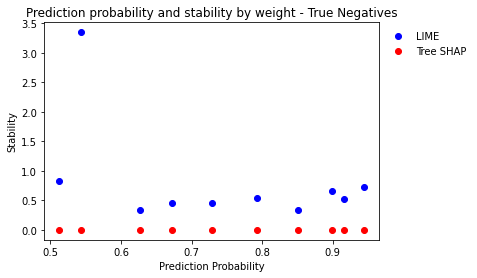

True Positives
Average LIME Weights Stability: 0.5442745621153509
Average SHAP Weights Stability: 2.0416517026336545e-17
10


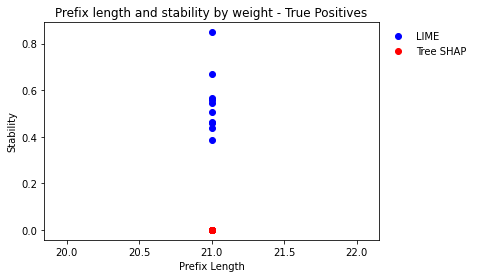

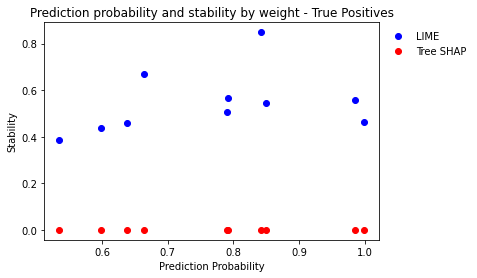

False Negatives
Average LIME Weights Stability: 1.6660640384772933
Average SHAP Weights Stability: 1.8953588510066365e-17
10


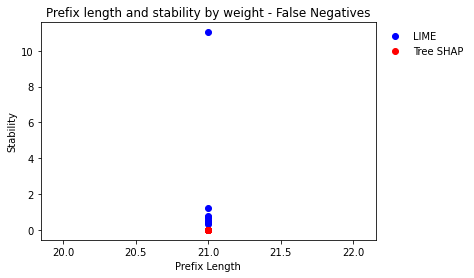

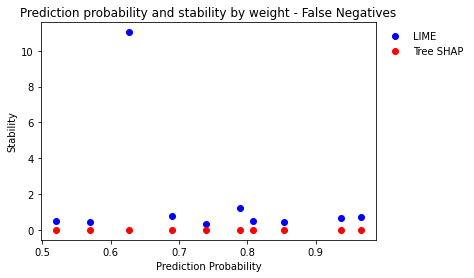

False Positives
Average LIME Weights Stability: 0.7285191602662028
Average SHAP Weights Stability: 2.2096053868506916e-17
10


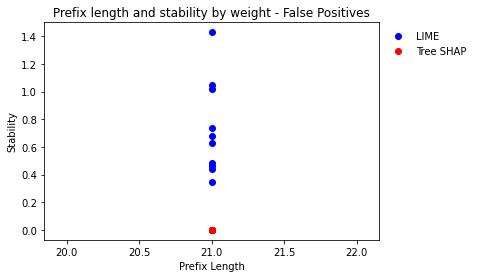

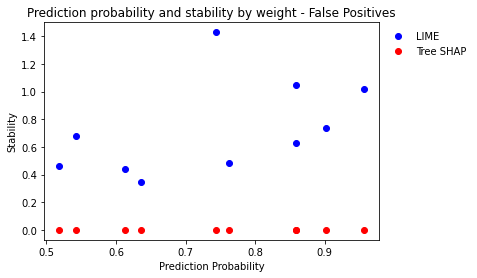

Bucket 22
True Negatives
Average LIME Weights Stability: 0.6293669094872155
Average SHAP Weights Stability: 1.8705745731123006e-17
10


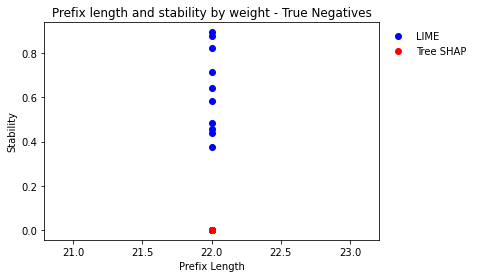

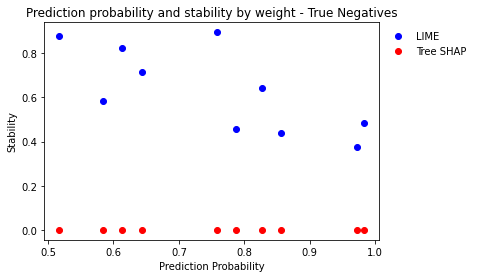

True Positives
Average LIME Weights Stability: 0.5921632669386666
Average SHAP Weights Stability: 1.9623818096393052e-17
10


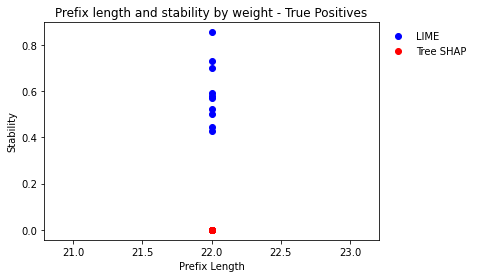

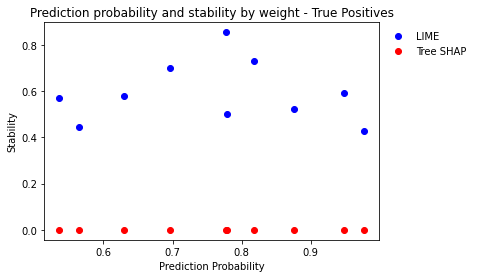

False Negatives
Average LIME Weights Stability: 1.1827996488998944
Average SHAP Weights Stability: 1.993596874398576e-17
10


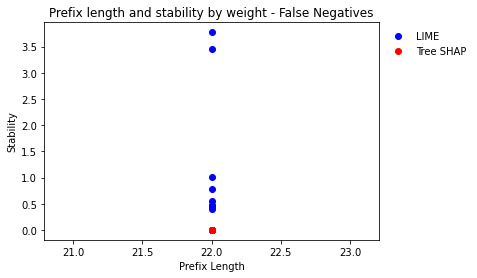

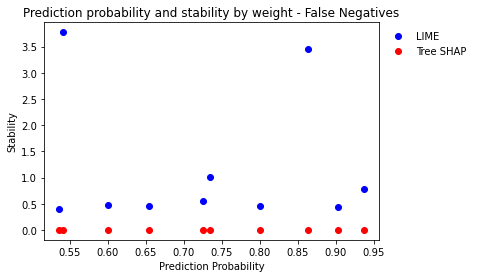

False Positives
Average LIME Weights Stability: 0.7749002799851326
Average SHAP Weights Stability: 1.937139350673466e-17
10


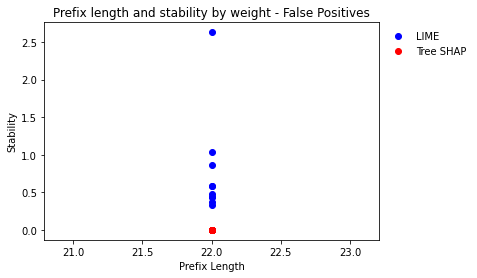

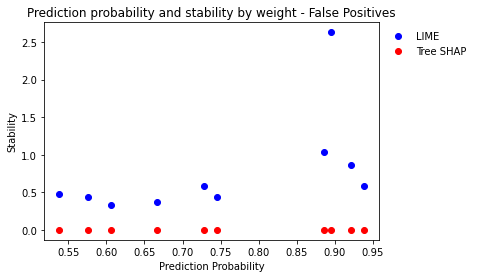

Bucket 23
True Negatives
Average LIME Weights Stability: 0.5810660434655674
Average SHAP Weights Stability: 2.1225076453788913e-17
10


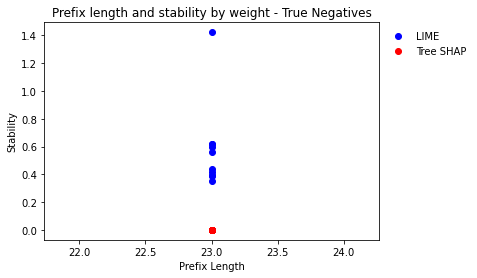

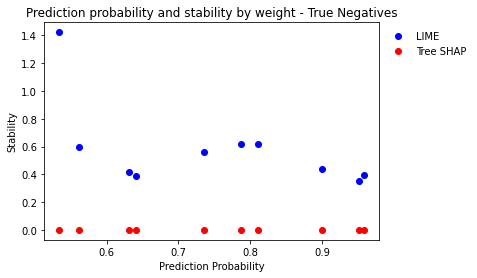

True Positives
Average LIME Weights Stability: 1.0868510977314578
Average SHAP Weights Stability: 1.941000346880436e-17
10


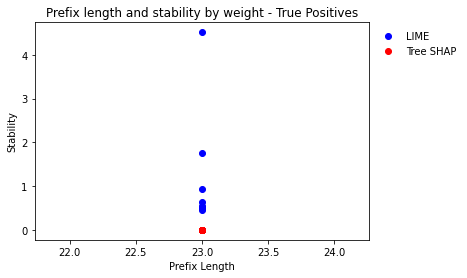

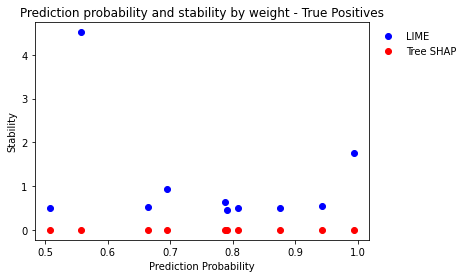

False Negatives
Average LIME Weights Stability: 1.5792193201308464
Average SHAP Weights Stability: 2.266470839393174e-17
10


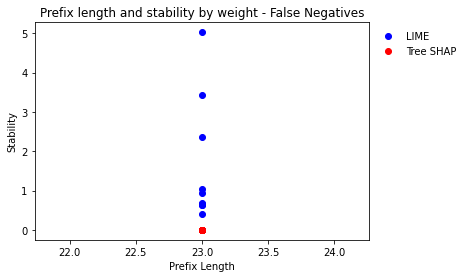

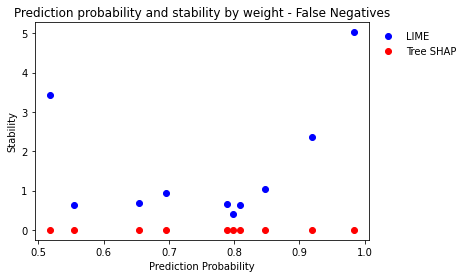

False Positives
Average LIME Weights Stability: 1.0791014328779938
Average SHAP Weights Stability: 2.0361143388180746e-17
10


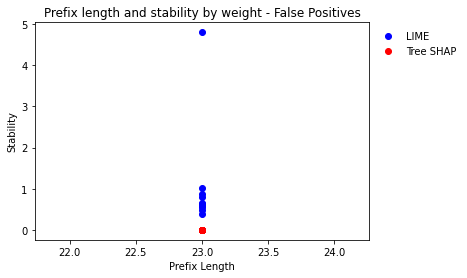

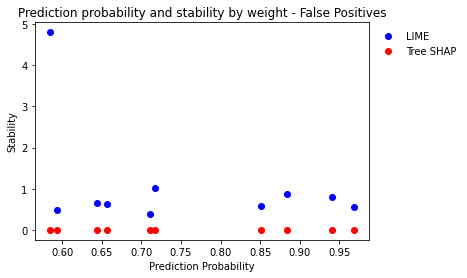

Bucket 24
True Negatives
Average LIME Weights Stability: 1.0514236430483657
Average SHAP Weights Stability: 1.9289525409298395e-17
10


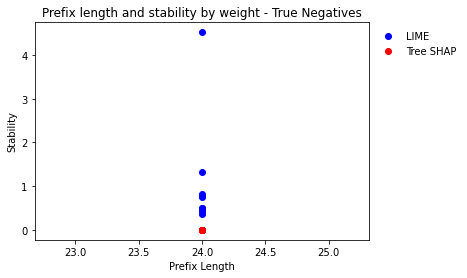

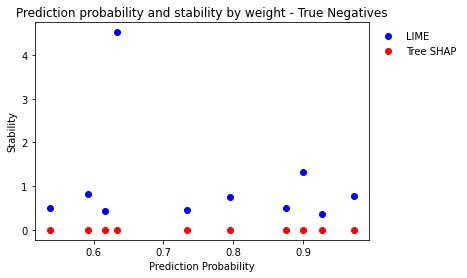

True Positives
Average LIME Weights Stability: 0.6853598610335614
Average SHAP Weights Stability: 2.051286269313575e-17
10


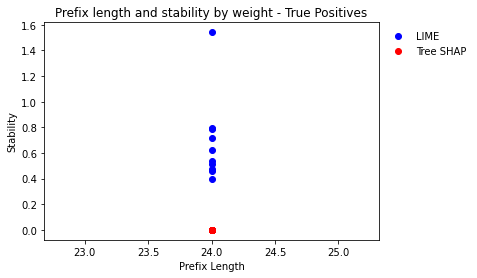

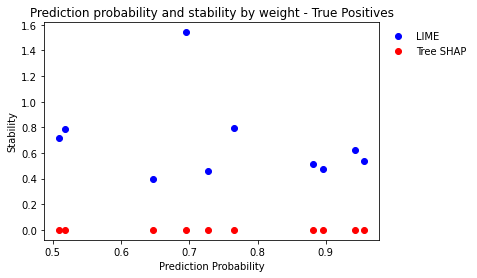

False Negatives
Average LIME Weights Stability: 0.5463871805035171
Average SHAP Weights Stability: 1.916098725936103e-17
10


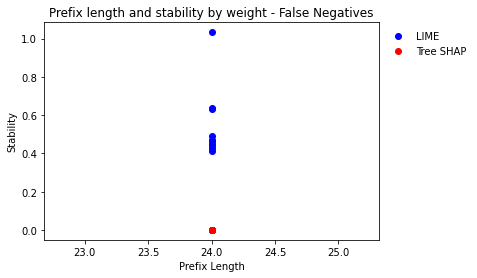

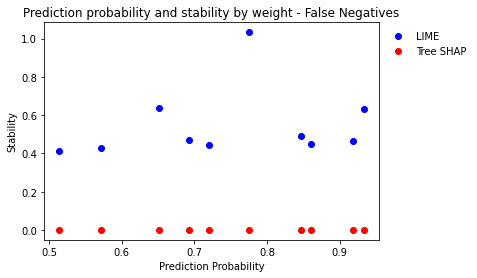

False Positives
Average LIME Weights Stability: 0.5906582130654146
Average SHAP Weights Stability: 1.7873832160257534e-17
10


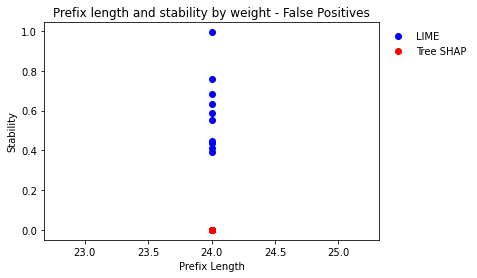

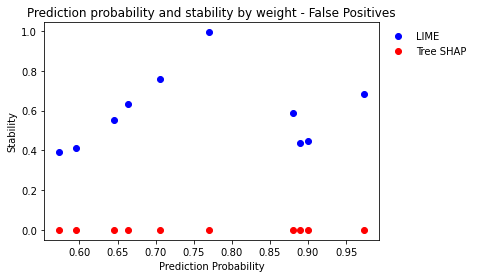

Bucket 25
True Negatives
Average LIME Weights Stability: 0.6260129158909179
Average SHAP Weights Stability: 1.9731404314778924e-17
10


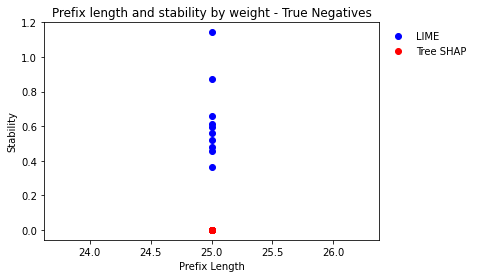

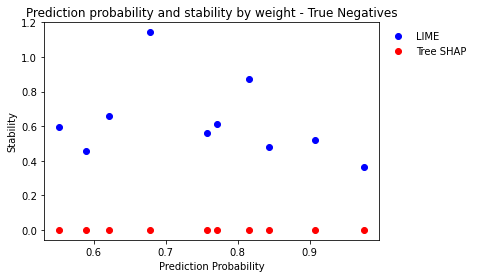

True Positives
Average LIME Weights Stability: 0.7254445612783077
Average SHAP Weights Stability: 1.9322112806393203e-17
10


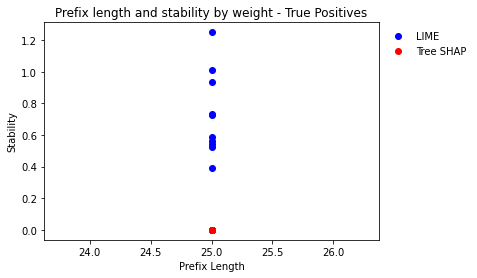

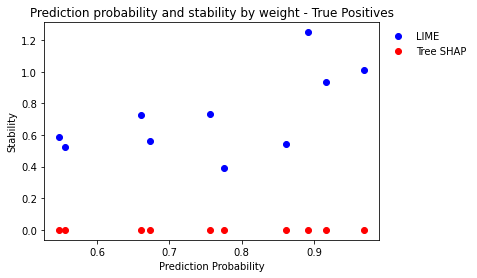

False Negatives
Average LIME Weights Stability: 0.6786808573115982
Average SHAP Weights Stability: 1.9679384670187165e-17
10


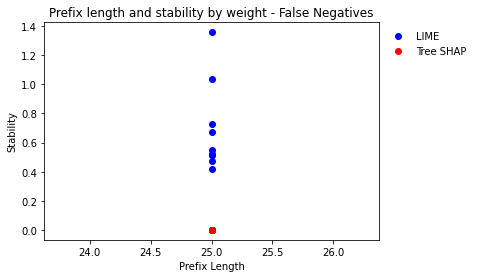

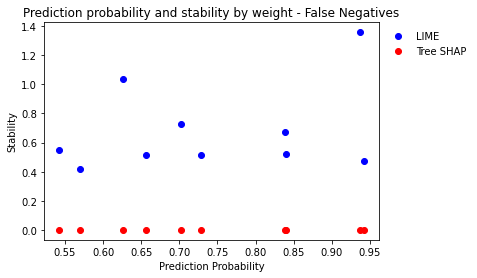

False Positives
Average LIME Weights Stability: 0.9683874449483199
Average SHAP Weights Stability: 1.954125050057249e-17
10


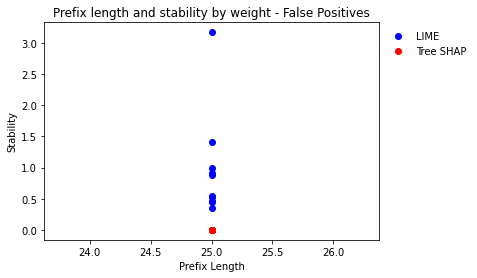

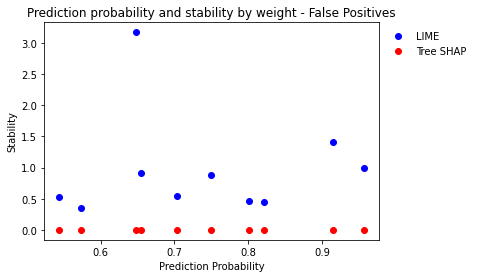

In [7]:
all_caseID = []
all_lengths = []
all_proba = []
all_lime_stab = []
all_shap_stab = []

for dataset_name in datasets:

    dataset_manager = DatasetManager(dataset_name)

    for ii in range(n_iter):
        num_buckets = len([name for name in os.listdir(os.path.join(PATH,'%s/%s_%s/models'% (dataset_ref, cls_method, method_name)))])
        
        if num_buckets < max_prefix:
            max_prefix = num_buckets
            
        buckets = range(0, max_prefix, gap)

        for bucket in buckets:
            bucketID = bucket+1
            print ('Bucket', bucketID)

            #import everything needed to sort and predict
            feat_comb_path = os.path.join(PATH, "%s/%s_%s/bucketers_and_encoders/feature_combiner_bucket_%s.joblib" % (dataset_ref, cls_method, method_name, bucketID))
            cls_path = os.path.join(PATH, "%s/%s_%s/models/cls_bucket_%s.joblib" % (dataset_ref, cls_method, method_name, bucketID))
            cls = joblib.load(cls_path)
            feature_combiner = joblib.load(feat_comb_path)

            #import previously identified samples
            tn_path = os.path.join(PATH, "%s/%s_%s/samples/true_neg_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            tp_path = os.path.join(PATH, "%s/%s_%s/samples/true_pos_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            fn_path = os.path.join(PATH, "%s/%s_%s/samples/false_neg_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            fp_path = os.path.join(PATH, "%s/%s_%s/samples/false_pos_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))

            sample_instances = []

            with open (tn_path, 'rb') as f:
                tn_list = pickle.load(f)
            with open (tp_path, 'rb') as f:
                tp_list = pickle.load(f)
            with open (fn_path, 'rb') as f:
                fn_list = pickle.load(f)
            with open (fp_path, 'rb') as f:
                fp_list = pickle.load(f)

            #save results to a list
            sample_instances.append(tn_list)
            sample_instances.append(tp_list)
            sample_instances.append(fn_list)
            sample_instances.append(fp_list)
            
            type_list = ["True Negatives", "True Positives", "False Negatives", "False Positives"]
            
            for i in range(len(sample_instances)):
                print (type_list[i])
                data = pd.DataFrame.from_records(sample_instances[i])
                
                dispersal_lime = []
                dispersal_shap = []
                adj_dispersal_lime = []
                adj_dispersal_shap = []
                
                case_id = pd.Series(data['caseID'])
                nr_events = pd.Series(data['nr_events'])
                proba = pd.Series(data['proba'])
                lime_stability = pd.Series(data['adjusted_lime_importance_stability'])
                tree_shap_stability = pd.Series(data['adjusted_shap_importance_stability'])
                
                all_caseID.extend(case_id)
                all_lengths.extend(nr_events)
                all_proba.extend(proba)
                all_lime_stab.extend(lime_stability)
                all_shap_stab.extend(tree_shap_stability)
                
                print("Average LIME Weights Stability:", statistics.mean(lime_stability))
                print("Average SHAP Weights Stability:", statistics.mean(tree_shap_stability))
                
                shap_dispersion = [disp for disp in tree_shap_stability if disp > 0]
                
                print (len(shap_dispersion))
                
                fig, ax = plt.subplots()
                ax.plot(nr_events, lime_stability, 'bo', label = "LIME")
                ax.plot(nr_events, tree_shap_stability, 'ro', label = "Tree SHAP")
                ax.set_xlabel("Prefix Length")
                ax.set_ylabel("Stability")
                ax.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                plt.title("Prefix length and stability by weight - "+type_list[i])
                plt.show()
                
                fig2, ax2 = plt.subplots()
                ax2.plot(proba, lime_stability, 'bo', label = "LIME")
                ax2.plot(proba, tree_shap_stability, 'ro', label = "Tree SHAP")
                ax2.set_xlabel("Prediction Probability")
                ax2.set_ylabel("Stability")
                ax2.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                plt.title("Prediction probability and stability by weight - "+type_list[i])
                plt.show()

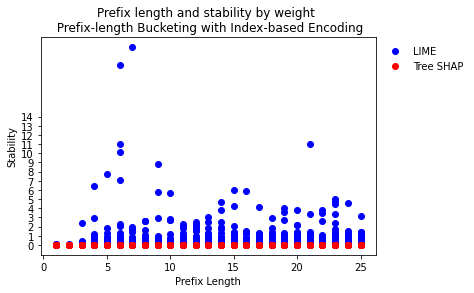

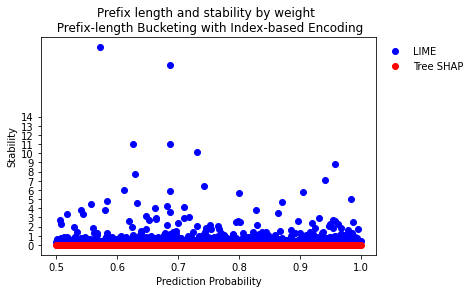

In [8]:
fig, ax = plt.subplots()
ax.plot(all_lengths, all_lime_stab, 'bo', label = "LIME")
ax.plot(all_lengths, all_shap_stab, 'ro', label = "Tree SHAP")
ax.set_xlabel("Prefix Length")
ax.set_ylabel("Stability")
ax.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
plt.yticks(np.arange(0,15,1))
plt.title("Prefix length and stability by weight \n Prefix-length Bucketing with Index-based Encoding")
plt.show()

fig2, ax2 = plt.subplots()
ax2.plot(all_proba, all_lime_stab, 'bo', label = "LIME")
ax2.plot(all_proba, all_shap_stab, 'ro', label = "Tree SHAP")
ax2.set_xlabel("Prediction Probability")
ax2.set_ylabel("Stability")
ax2.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
plt.yticks(np.arange(0,15,1))
plt.title("Prefix length and stability by weight \n Prefix-length Bucketing with Index-based Encoding")
plt.show()

In [9]:
lime_mean = np.mean(all_lime_stab)
lime_std = np.std(all_lime_stab)
lime_upper = lime_mean + (3*lime_std)
lime_lower = lime_mean - (3*lime_std)

shap_mean = np.mean(all_shap_stab)
shap_std = np.std(all_shap_stab)
shap_upper = shap_mean + (3*shap_std)
shap_lower = shap_mean - (3*shap_std)

lime_outliers = [i for i in all_lime_stab if i > lime_upper or i < lime_lower]
shap_outliers = [i for i in all_shap_stab if i > shap_upper or i < shap_lower]

print (lime_mean)
print (shap_mean)
print(len(lime_outliers))
print(len(shap_outliers))
print(str(len(lime_outliers)/len(all_lime_stab)*100)+"%")
print(str(len(shap_outliers)/len(all_shap_stab)*100)+"%")

0.7002585702209793
8.902868841253237e-17
15
25
1.5%
2.5%


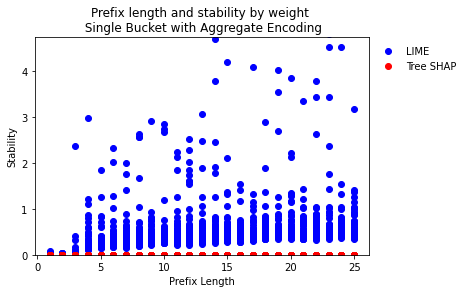

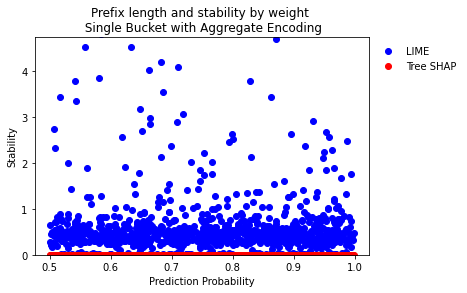

In [10]:
fig, ax = plt.subplots()
ax.plot(all_lengths, all_lime_stab, 'bo', label = "LIME")
ax.plot(all_lengths, all_shap_stab, 'ro', label = "Tree SHAP")
ax.set_xlabel("Prefix Length")
ax.set_ylabel("Stability")
ax.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
#plt.yticks(np.arange(0,15,1))
plt.ylim(0, lime_upper)
plt.title("Prefix length and stability by weight \n Single Bucket with Aggregate Encoding")
plt.show()

fig2, ax2 = plt.subplots()
ax2.plot(all_proba, all_lime_stab, 'bo', label = "LIME")
ax2.plot(all_proba, all_shap_stab, 'ro', label = "Tree SHAP")
ax2.set_xlabel("Prediction Probability")
ax2.set_ylabel("Stability")
ax2.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
#plt.yticks(np.arange(0,15,1))
plt.ylim(0, lime_upper)
plt.title("Prefix length and stability by weight \n Single Bucket with Aggregate Encoding")
plt.show()

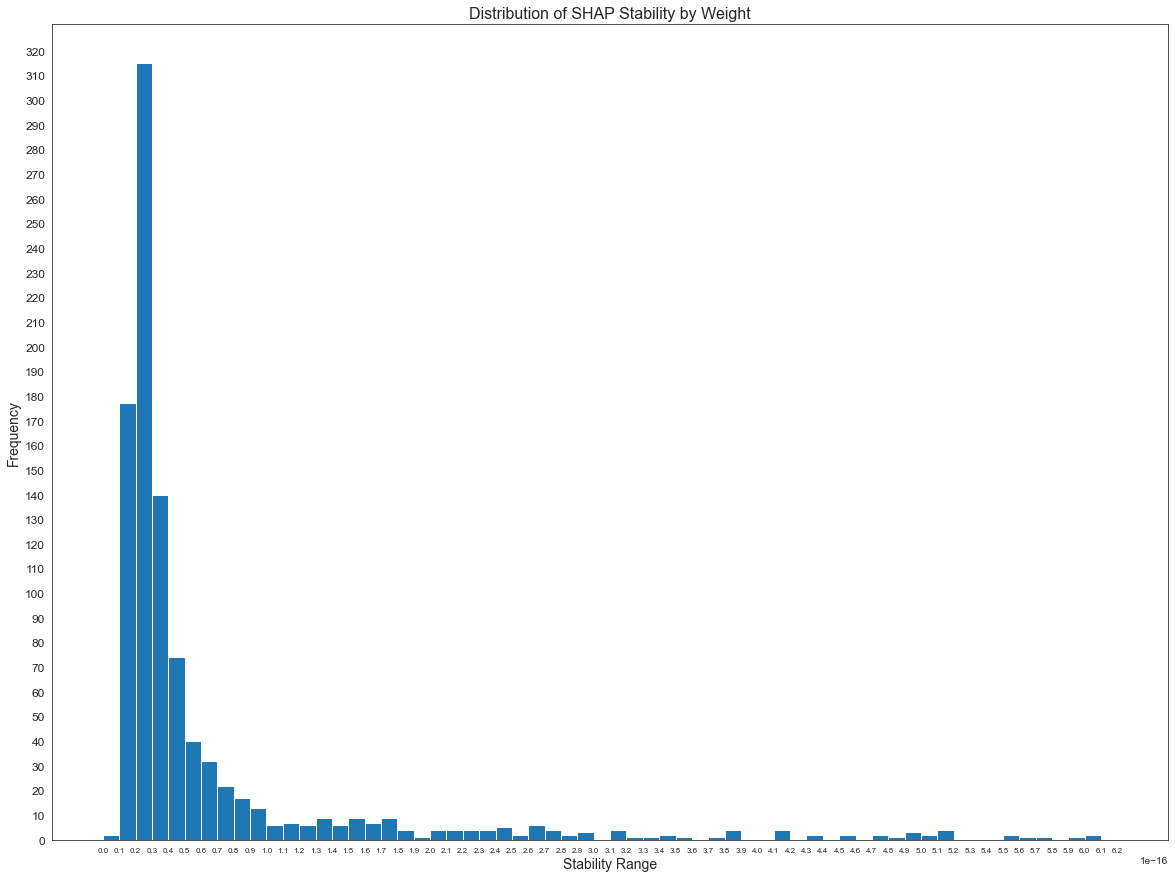

In [18]:
bins = np.arange(0, shap_upper+1e-17, 1e-17)
yticks = np.arange(0, 330, 10)
sns.set_style("white")
plt.subplots(figsize=(20, 15))
plt.hist(all_shap_stab, bins = bins)
#plt.figsize([50, 50])
plt.xticks(bins, fontsize = 8)
plt.yticks(yticks, fontsize = 12)
plt.title("Distribution of SHAP Stability by Weight", fontsize = 16)
plt.xlabel("Stability Range", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.show()

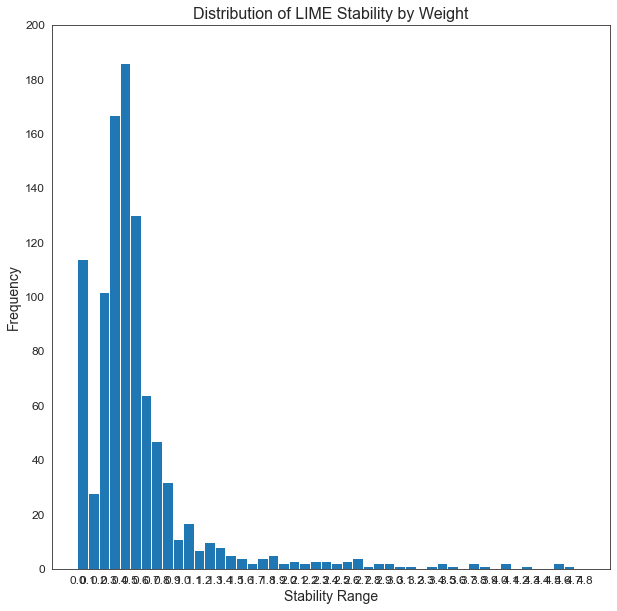

In [19]:
bins = np.arange(0, lime_upper+0.1, 0.1)
yticks = np.arange(0, 220, 20)
sns.set_style("white")
plt.subplots(figsize=(10, 10))
plt.hist(all_lime_stab, bins = bins)
#plt.figsize([50, 50])
plt.xticks(bins, fontsize = 12)
plt.yticks(yticks, fontsize = 12)
plt.title("Distribution of LIME Stability by Weight", fontsize = 16)
plt.xlabel("Stability Range", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.show()